# Importações

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
import os
import pickle
models_prefix = './models-persisted'

def persist_instance(variable:any, file_name:str):
    if not os.path.exists(models_prefix): os.makedirs(models_prefix)

    with open(f'{models_prefix}/{file_name}.pkl', 'wb') as file:
        pickle.dump(variable, file)

def load_instance(path:str):
    with open(f'{path}', 'rb') as file:
        return pickle.load(file)

# Leitura dos dados

In [6]:
from essayDataDiggestor import EssayDataDiggestor

data_path = '../data/collected_data'
data_diggestor = EssayDataDiggestor()

not_measured_by_sensor = ['PT100 3 [ºC]', 'PT100 4 [ºC]', 'Vel. do Ar [m/s]']
target_col = 'Umidade Média Produto [%]'

# Reading data from files
df_train = data_diggestor.get_labeled_essays(data_path)
df_essays = data_diggestor.get_essays(data_path)
df_measures = data_diggestor.get_labeled_essays(data_path, get_measures_flag=True)

# Removing columns not measured by sensors
df_train = df_train.drop(columns=not_measured_by_sensor).reset_index(drop=True)
df_essays = df_essays.drop(columns=not_measured_by_sensor).reset_index(drop=True)
df_measures = df_measures.drop(columns=not_measured_by_sensor).reset_index(drop=True)

print('DataFrame de treinamento')
display(df_train.head())
print('\n\nDataFrame com dados em tempo real do ensaio')
display(df_essays.head())

DataFrame de treinamento


Time  PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0     0.000     23.681101     23.626140        23.174812      57.704340   
1   899.564     27.150231     27.212689        24.787157      47.790284   
2  1798.938     26.887455     26.675792        26.097392      44.201039   
3  2700.298     26.897853     26.742584        27.033274      42.788991   
4  3601.595     43.864988     39.788933        27.676899      40.073266   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Ensaio  Umidade Média Produto [%]  
0        24.255182      73.746678       0                  55.223333  
1        28.432172      87.234795       0                  48.006667  
2        26.974166      92.332055       0                  41.003333  
3        26.882220      93.655657       0                   7.083333  
4        36.175378      36.280460       0                   2.283333



DataFrame com dados em tempo real do ensaio


Time  PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0   0.000     23.681101     23.626140        23.174812      57.704340   
1   3.253     23.681888     23.623464        22.944946      57.779871   
2   6.655     23.675593     23.618114        23.158393      57.628810   
3   9.884     23.666780     23.609773        23.164961      57.326689   
4  13.184     23.649784     23.598442        22.987635      56.486007   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Ensaio  
0        24.255182      73.746678       0  
1        24.288020      73.914167       0  
2        24.333993      74.577554       0  
3        24.383250      75.809093       0  
4        24.376682      77.267243       0

In [7]:
df_measures = df_measures[
    [
        'Time',
        'Umidade Média Produto [%]',
        'Umidade 0 Produto [%]',
        'Umidade 1 Produto [%]',
        'Umidade 2 Produto [%]',
        'Ensaio'
    ]
]

df_measures.head()

Time  Umidade Média Produto [%]  Umidade 0 Produto [%]  \
0     0.000                  55.223333                  44.55   
1   899.564                  48.006667                  48.18   
2  1798.938                  41.003333                  41.39   
3  2700.298                   7.083333                   7.61   
4  3601.595                   2.283333                   2.44   

   Umidade 1 Produto [%]  Umidade 2 Produto [%]  Ensaio  
0                  59.48                  61.64       0  
1                  48.39                  47.45       0  
2                  39.94                  41.68       0  
3                   6.74                   6.90       0  
4                   2.32                   2.09       0

# Visualização dos dados

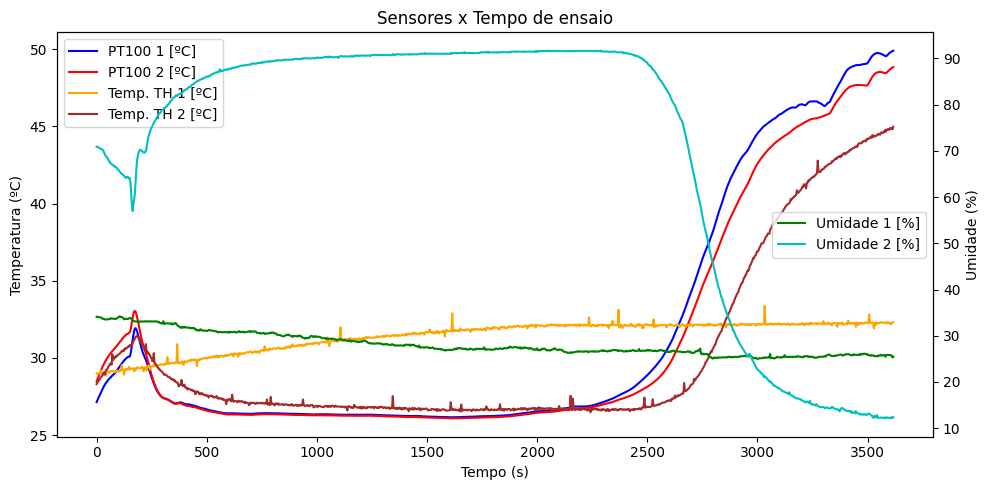

In [8]:
# Graphic of real time data variables per time in a test
essay_number = 5
mask = ( df_essays['Ensaio'] == essay_number )
df_test = df_essays[mask]
df_columns = df_essays.drop(columns=['Time', 'Ensaio']).columns

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

trigger = False
color = ['b', 'r', 'orange', 'green', 'brown', 'c']

for i, column in enumerate(df_columns):
    if ('ºC' in column):
        ax1.plot(df_test.Time, df_test[column], label=column, color=color[i])
    elif('%' in column):
        ax2.plot(df_test.Time, df_test[column], label=column, color=color[i])

ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Temperatura (ºC)')
ax2.set_ylabel('Umidade (%)')

# ax1.set_yticks(np.linspace(10, 90, 9))

ax1.legend(loc='upper left')
ax2.legend(loc='center right')
plt.title("Sensores x Tempo de ensaio")
plt.tight_layout()
plt.show()

Time  Umidade Média Produto [%]  Umidade 0 Produto [%]  \
0     0.000                  59.280000                  59.68   
1   898.795                  47.513333                  47.50   
2  1800.115                  30.583333                  30.73   
3  2698.281                   5.256667                   5.23   
4  3598.803                   2.146667                   2.22   

   Umidade 1 Produto [%]  Umidade 2 Produto [%]  Ensaio  Error  
0                  59.27                  58.89       5   0.79  
1                  47.35                  47.69       5   0.34  
2                  30.63                  30.39       5   0.34  
3                   5.22                   5.32       5   0.10  
4                   2.24                   1.98       5   0.26

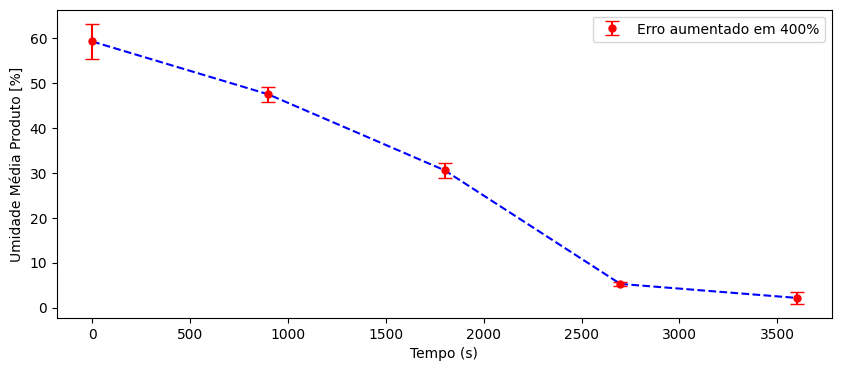

In [9]:
#Graphic of humidity per time in a test
mask = ( df_measures['Ensaio'] == essay_number )
df_test = df_measures[mask].reset_index(drop=True)
df_test['Error'] = df_test[
    ['Umidade 0 Produto [%]', 'Umidade 1 Produto [%]', 'Umidade 2 Produto [%]']
].apply(lambda row : row.max() - row.min(), axis=1)

display(df_test)

error_factor = 5

plt.figure(figsize=(10, 4))
plt.plot(df_test.Time, df_test[target_col], '--b')
plt.errorbar(df_test.Time,
             df_test[target_col],
             yerr=df_test.Error*error_factor,
             fmt='o', color='r', label=f'Erro aumentado em {(error_factor-1)*100}%',
             markersize=5, capsize=5)
plt.xlabel('Tempo (s)')
plt.ylabel(target_col)

plt.legend()
plt.show()

# Criação de dataframes adicionais

### Dataframe sem tempo

In [10]:
df_train_timeless = df_train.copy(deep=True).drop(columns=['Time'])
df_essays_timeless = df_essays.copy(deep=True).drop(columns=['Time'])

### Dataframe T-1

In [11]:
df_train_t1 = pd.DataFrame()
essays = list(df_train['Ensaio'].unique())
for essay in essays:
    mask = (df_train['Ensaio'] == essay)
    df_essay = df_train[mask].copy(deep=True)
    df_columns = set(list(df_essay.columns))
    columns_to_avoid = set(['Ensaio', 'Umidade Média Produto [%]', 'Time'])

    for col in list(df_columns - columns_to_avoid):
        df_essay[f'{col} t-1'] = df_essay[col].shift()
    
    df_essay.dropna(inplace=True)
    df_essay = df_essay.reset_index(drop=True)
    
    df_train_t1 = pd.concat([df_train_t1, df_essay])

df_train_t1 = df_train_t1.reset_index(drop=True)

In [12]:
df_essays_t1 = pd.DataFrame()
essays = list(df_essays['Ensaio'].unique())
for essay in essays:
    mask = (df_essays['Ensaio'] == essay)
    df_essay = df_essays[mask].copy(deep=True)
    df_columns = set(list(df_essay.columns))
    columns_to_avoid = set(['Ensaio', 'Time'])

    for col in list(df_columns - columns_to_avoid):
        df_essay[f'{col} t-1'] = df_essay[col].shift()
    
    df_essay.dropna(inplace=True)
    df_essay = df_essay.reset_index(drop=True)
    
    df_essays_t1 = pd.concat([df_essays_t1, df_essay])

df_essays_t1 = df_essays_t1.reset_index(drop=True)

### Dataframe T-2

In [13]:
df_train_t2 = pd.DataFrame()
essays = list(df_train['Ensaio'].unique())
for essay in essays:
    mask = (df_train['Ensaio'] == essay)
    df_essay = df_train[mask].copy(deep=True)
    df_columns = set(list(df_essay.columns))
    columns_to_avoid = set(['Ensaio', 'Umidade Média Produto [%]', 'Time'])

    for col in list(df_columns - columns_to_avoid):
        df_essay[f'{col} t-1'] = df_essay[col].shift()
        df_essay[f'{col} t-2'] = df_essay[col].shift().shift()
    
    df_essay.dropna(inplace=True)
    df_essay = df_essay.reset_index(drop=True)
    
    df_train_t2 = pd.concat([df_train_t2, df_essay])

df_train_t2 = df_train_t2.reset_index(drop=True)

In [14]:
df_essays_t2 = pd.DataFrame()
essays = list(df_essays['Ensaio'].unique())
for essay in essays:
    mask = (df_essays['Ensaio'] == essay)
    df_essay = df_essays[mask].copy(deep=True)
    df_columns = set(list(df_essay.columns))
    columns_to_avoid = set(['Ensaio', 'Time'])

    for col in list(df_columns - columns_to_avoid):
        df_essay[f'{col} t-1'] = df_essay[col].shift()
        df_essay[f'{col} t-2'] = df_essay[col].shift().shift()
    
    df_essay.dropna(inplace=True)
    df_essay = df_essay.reset_index(drop=True)
    
    df_essays_t2 = pd.concat([df_essays_t2, df_essay])

df_essays_t2 = df_essays_t2.reset_index(drop=True)

# Normalização dos dados

### Função auxiliar

In [15]:
from sklearn.preprocessing import StandardScaler

def init_normalize(dataFrame:pd.DataFrame, columns_to_avoid:list = ['Ensaio', target_col]):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(dataFrame.drop(columns=columns_to_avoid))
    df_scaled = pd.DataFrame(df_scaled, columns=dataFrame.drop(columns=columns_to_avoid).columns)
    df_scaled = pd.concat([df_scaled, dataFrame[columns_to_avoid]], axis=1)
    return (df_scaled, scaler)

def normalize(dataFrame:pd.DataFrame, scaler:StandardScaler, columns_to_avoid:list = ['Ensaio']):
    df_scaled = scaler.transform(dataFrame.drop(columns=columns_to_avoid))
    df_scaled = pd.DataFrame(df_scaled, columns=dataFrame.drop(columns=columns_to_avoid).columns)
    df_scaled = pd.concat([df_scaled, dataFrame[columns_to_avoid]], axis=1)
    return df_scaled

### Dataframe normal

In [16]:
df_train_norm, scaler_df_norm = init_normalize(df_train)
df_train_norm.head()

Time  PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0 -1.414184     -1.073482     -1.118343        -1.179055       0.752352   
1 -0.707457     -0.655458     -0.632846        -0.737353      -0.007215   
2 -0.000880     -0.687122     -0.705524        -0.378413      -0.282206   
3  0.707258     -0.685869     -0.696482        -0.122028      -0.390390   
4  1.415346      1.358640      1.069553         0.054293      -0.598456   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Ensaio  Umidade Média Produto [%]  
0        -1.058263       0.003619       0                  55.223333  
1        -0.356589       0.488132       0                  48.006667  
2        -0.601513       0.671234       0                  41.003333  
3        -0.616958       0.718780       0                   7.083333  
4         0.944158      -1.342225       0                   2.283333

In [17]:
df_essays_norm = normalize(df_essays, scaler_df_norm)
df_essays_norm.head()

Time  PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0 -1.414184     -1.073482     -1.118343        -1.179055       0.752352   
1 -1.411628     -1.073387     -1.118706        -1.242027       0.758139   
2 -1.408955     -1.074146     -1.119430        -1.183553       0.746565   
3 -1.406418     -1.075208     -1.120559        -1.181754       0.723418   
4 -1.403826     -1.077255     -1.122093        -1.230333       0.659009   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Ensaio  
0        -1.058263       0.003619       0  
1        -1.052747       0.009635       0  
2        -1.045024       0.033465       0  
3        -1.036749       0.077704       0  
4        -1.037853       0.130083       0

### Dataframe sem tempo

In [18]:
df_train_timeless_norm, scaler_df_timeless = init_normalize(df_train_timeless)
df_train_timeless_norm.head()

PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0     -1.073482     -1.118343        -1.179055       0.752352   
1     -0.655458     -0.632846        -0.737353      -0.007215   
2     -0.687122     -0.705524        -0.378413      -0.282206   
3     -0.685869     -0.696482        -0.122028      -0.390390   
4      1.358640      1.069553         0.054293      -0.598456   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Ensaio  Umidade Média Produto [%]  
0        -1.058263       0.003619       0                  55.223333  
1        -0.356589       0.488132       0                  48.006667  
2        -0.601513       0.671234       0                  41.003333  
3        -0.616958       0.718780       0                   7.083333  
4         0.944158      -1.342225       0                   2.283333

In [19]:
columns_to_avoid = ['Ensaio']
df_essays_timeless_norm = normalize(df_essays_timeless, scaler_df_timeless)
df_essays_timeless_norm.head()

PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0     -1.073482     -1.118343        -1.179055       0.752352   
1     -1.073387     -1.118706        -1.242027       0.758139   
2     -1.074146     -1.119430        -1.183553       0.746565   
3     -1.075208     -1.120559        -1.181754       0.723418   
4     -1.077255     -1.122093        -1.230333       0.659009   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Ensaio  
0        -1.058263       0.003619       0  
1        -1.052747       0.009635       0  
2        -1.045024       0.033465       0  
3        -1.036749       0.077704       0  
4        -1.037853       0.130083       0

### Dataframe T-1

In [20]:
df_train_t1_norm, scaler_df_t1 = init_normalize(df_train_t1)
df_train_t1_norm.head()

Time  PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0 -1.342046     -0.815284     -0.779366        -0.982181       0.157115   
1 -0.448307     -0.845935     -0.849450        -0.595298      -0.142976   
2  0.447405     -0.844722     -0.840732        -0.318952      -0.261035   
3  1.343054      1.134385      0.862285        -0.128904      -0.488092   
4 -1.343127     -0.840551     -0.818996        -0.282106      -0.131719   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Umidade 1 [%] t-1  Temp. TH 2 [ºC] t-1  \
0        -0.514717       0.532722           0.674861            -1.622652   
1        -0.750398       0.700672          -0.076186             0.254501   
2        -0.765260       0.744284          -0.348092            -0.400731   
3         0.736938      -1.146186          -0.455063            -0.442052   
4        -0.708994       0.686388           0.078301            -0.524694   

   PT100 1 [ºC] t-1  Umidade 2 [%] t-1  Temp. TH 1 [ºC] t-1  PT100 2 [ºC] t-1  \
0         -1.144147          -0.939009            -1.096068         -1.321046   
1         -0.406283           0.087815            -0.658850         -0.383893   
2         -0.462174           0.475860            -0.303556         -0.524182   
3         -0.459963           0.576623            -0.049774         -0.506730   
4         -0.575148          -1.318522            -0.359655         -0.596582   

   Ensaio  Umidade Média Produto [%]  
0       0                  48.006667  
1       0                  41.003333  
2       0                   7.083333  
3       0                   2.283333  
4       1                  51.775000

In [21]:
df_essays_t1_norm = normalize(df_essays_t1, scaler_df_t1)
df_essays_t1_norm.head()

Time  PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0 -2.232741     -1.219843     -1.247889        -1.526145       0.992328   
1 -2.229360     -1.220578     -1.248587        -1.463119       0.979698   
2 -2.226151     -1.221606     -1.249676        -1.461180       0.954438   
3 -2.222872     -1.223588     -1.251155        -1.513540       0.884150   
4 -2.219420     -1.226305     -1.253394        -1.319614       0.823746   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Umidade 1 [%] t-1  Temp. TH 2 [ºC] t-1  \
0        -1.184601       0.093817           0.674861            -1.622652   
1        -1.177170       0.115675           0.680583            -1.607895   
2        -1.169208       0.156253           0.669139            -1.587234   
3        -1.170270       0.204298           0.646252            -1.565098   
4        -1.170800       0.246500           0.582565            -1.568050   

   PT100 1 [ºC] t-1  Umidade 2 [%] t-1  Temp. TH 1 [ºC] t-1  PT100 2 [ºC] t-1  \
0         -1.144147          -0.939009            -1.096068         -1.321046   
1         -1.143979          -0.926258            -1.158400         -1.321745   
2         -1.145318          -0.875756            -1.100520         -1.323143   
3         -1.147193          -0.782001            -1.098739         -1.325323   
4         -1.150808          -0.670995            -1.146824         -1.328283   

   Ensaio  
0       0  
1       0  
2       0  
3       0  
4       0

### Dataframe T-2

In [22]:
df_train_t2_norm, scaler_df_t2 = init_normalize(df_train_t2)
df_train_t2_norm.head()

Time  PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0 -1.226179     -1.047560     -1.028659        -0.735284      -0.041838   
1  0.000278     -1.046395     -1.020359        -0.450144      -0.162634   
2  1.226648      0.855051      0.600889        -0.254047      -0.394956   
3 -1.223173     -1.047878     -1.005442         0.021089      -0.349727   
4  0.001618     -0.690006     -0.778658         0.200177      -0.506762   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Umidade 1 [%] t-1  Umidade 1 [%] t-2  \
0        -0.868254       0.842923           0.110353           0.553900   
1        -0.881963       0.883510          -0.189344          -0.179369   
2         0.503665      -0.875824          -0.307248          -0.444839   
3        -0.853565       0.858332          -0.178102          -0.028539   
4        -0.891756       0.865180          -0.489863          -0.434880   

   Temp. TH 2 [ºC] t-1  ...  PT100 1 [ºC] t-1  PT100 1 [ºC] t-2  \
0             0.021158  ...         -0.554201         -2.366404   
1            -0.630680  ...         -0.606206         -0.041032   
2            -0.671787  ...         -0.604148         -0.217172   
3            -0.516168  ...         -0.597071         -0.573207   
4            -0.586637  ...         -0.606767         -0.186232   

   Umidade 2 [%] t-1  Umidade 2 [%] t-2  Temp. TH 1 [ºC] t-1  \
0           0.030938          -2.327741            -0.936283   
1           0.383592          -0.217698            -0.551564   
2           0.475165           0.579703            -0.276765   
3           0.353598          -3.107611            -0.240125   
4           0.418358           0.511882             0.177376   

   Temp. TH 1 [ºC] t-2  PT100 2 [ºC] t-1  PT100 2 [ºC] t-2  Ensaio  \
0            -0.956759         -0.527442         -2.137285       0   
1            -0.522300         -0.660528         -0.059532       0   
2            -0.169248         -0.643971         -0.370566       0   
3            -0.224993         -0.602696         -0.531082       1   
4             0.116556         -0.614216         -0.235408       1   

   Umidade Média Produto [%]  
0                  41.003333  
1                   7.083333  
2                   2.283333  
3                  35.256667  
4                   4.863333  

[5 rows x 21 columns]

In [23]:
df_essays_t2_norm = normalize(df_essays_t2, scaler_df_t2)
df_essays_t2_norm.head()

Time  PT100 1 [ºC]  PT100 2 [ºC]  Temp. TH 1 [ºC]  Umidade 1 [%]  \
0 -3.664891     -1.407502     -1.408632        -1.630726       1.106865   
1 -3.660497     -1.408490     -1.409669        -1.628724       1.081020   
2 -3.656007     -1.410395     -1.411077        -1.682751       1.009102   
3 -3.651280     -1.413005     -1.413208        -1.482653       0.947298   
4 -3.646627     -1.415474     -1.415594        -1.628724       0.892236   

   Temp. TH 2 [ºC]  Umidade 2 [%]  Umidade 1 [%] t-1  Umidade 1 [%] t-2  \
0        -1.261909       0.298505           0.944471           0.553900   
1        -1.254565       0.336269           0.931857           0.559486   
2        -1.255544       0.380981           0.906631           0.548314   
3        -1.256033       0.420255           0.836435           0.525968   
4        -1.255054       0.451172           0.776110           0.463789   

   Temp. TH 2 [ºC] t-1  Temp. TH 2 [ºC] t-2  PT100 1 [ºC] t-1  \
0            -1.831589            -2.300614         -1.240604   
1            -1.811035            -2.276087         -1.241850   
2            -1.789014            -2.241750         -1.243594   
3            -1.791950            -2.204959         -1.246957   
4            -1.793418            -2.209865         -1.251567   

   PT100 1 [ºC] t-2  Umidade 2 [%] t-1  Umidade 2 [%] t-2  \
0         -2.366404          -0.890649          -2.327741   
1         -2.365877          -0.844752          -2.301539   
2         -2.370097          -0.759548          -2.197761   
3         -2.376004          -0.658666          -2.005102   
4         -2.387396          -0.570053          -1.776994   

   Temp. TH 1 [ºC] t-1  Temp. TH 1 [ºC] t-2  PT100 2 [ºC] t-1  \
0            -1.477203            -0.956759         -1.417135   
1            -1.414530            -1.018698         -1.418461   
2            -1.412601            -0.961183         -1.420529   
3            -1.464669            -0.959413         -1.423337   
4            -1.271827            -1.007195         -1.427589   

   PT100 2 [ºC] t-2  Ensaio  
0         -2.137285       0  
1         -2.138835       0  
2         -2.141934       0  
3         -2.146766       0  
4         -2.153331       0

# Treinamento de modelos

## Importação de modelos

In [24]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PoissonRegressor

# Support Vector Machine
from sklearn.svm import SVR
from sklearn.svm import NuSVR

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

# Gaussian Process Regression
from sklearn.gaussian_process import GaussianProcessRegressor

# Decision Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

# Ensemble Methods
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Neural Network
from sklearn.neural_network import MLPRegressor

## Treinamento

### Organização de dataframes

In [25]:
dfs = {
    'standard': {
        'df': df_train,
        'essays': df_essays,
        'essays_norm': df_essays_norm,
        'scaler': scaler_df_norm,
        'train_norm': df_train_norm
    },
    'timeless': {
        'df': df_train_timeless,
        'essays': df_essays_timeless,
        'essays_norm': df_essays_timeless_norm,
        'scaler': scaler_df_timeless,
        'train_norm': df_train_timeless_norm
    },
    't-1': {
        'df': df_train_t1,
        'essays': df_essays_t1,
        'essays_norm': df_essays_t1_norm,
        'scaler': scaler_df_t1,
        'train_norm': df_train_t1_norm
    },
    't-2': {
        'df': df_train_t2,
        'essays': df_essays_t2,
        'essays_norm': df_essays_t2_norm,
        'scaler': scaler_df_t2,
        'train_norm': df_train_t2_norm
    }
}

### Cross validation

In [26]:
from sklearn.model_selection import cross_val_score
from json import dumps

def run_cross_validation(dataFrame:pd.DataFrame, verbose=True):
    
    base_models = [
      LinearRegression(),
      Ridge(max_iter=1000),
      Lasso(max_iter=1000),
      Lars(),
      ElasticNet(max_iter=1000),
      BayesianRidge(),
      SGDRegressor(max_iter=1000),
      TheilSenRegressor(max_iter=1000),
      HuberRegressor(max_iter=1000),
      PoissonRegressor(max_iter=1000),
      SVR(max_iter=1000),
      NuSVR(max_iter=1000),
      KNeighborsRegressor(n_neighbors=5),
      RadiusNeighborsRegressor(radius=5),
      GaussianProcessRegressor(),
      DecisionTreeRegressor(),
      ExtraTreeRegressor(),
      BaggingRegressor(),
      AdaBoostRegressor(),
      ExtraTreesRegressor(),
      RandomForestRegressor(),
      GradientBoostingRegressor(),
      HistGradientBoostingRegressor(),
      MLPRegressor(hidden_layer_sizes=[20, 20, 20],
        activation='tanh',
        max_iter=10000),
    ]

    best_score = 0
    best_model = None

    results = {}

    X_train = dataFrame.drop(columns=[target_col])
    y_train = dataFrame[target_col]

    cv = 17
    for estimator in base_models:

      model = estimator
      model_name = model.__class__.__name__
      
      scores = cross_val_score(model, X_train, y_train, cv=cv)

      results[model_name] = f'{scores.mean():.3f} +/- {scores.std():.3f}'

      if scores.mean() > best_score:
        best_score = scores.mean()
        best_model = model

    if (verbose):
      print(f'Best model: {best_model} - score: {best_score}')

    return results

In [27]:
results = {}
for key in dfs.keys():
    types_dfs = dfs[key].keys()
    for _type in types_dfs:
        if (_type == 'train_norm'):
            print(f'For {key} dataset, ', end='')
            result = run_cross_validation(df_train_norm)
            results[key] = result

For standard dataset, Best model: RandomForestRegressor() - score: 0.9811618759081272
For timeless dataset, Best model: BaggingRegressor() - score: 0.9821958754333697
For t-1 dataset, Best model: RandomForestRegressor() - score: 0.980684708040741
For t-2 dataset, Best model: RandomForestRegressor() - score: 0.9812241642312467


In [28]:
sorted_results = {}
for key in results.keys():
    df_type = results[key]
    sorted_scores = dict(sorted(df_type.items(), key=lambda item: item[1].split(' ')[0]))
    sorted_results[key] = sorted_scores
with open('result-cross-validation.json', 'w') as outfile:
    outfile.write(dumps(sorted_results))

In [29]:
print('Resultados cross validation')
cv_results = pd.DataFrame(sorted_results)
display(cv_results)

Resultados cross validation


standard         timeless  \
NuSVR                          0.121 +/- 0.038  0.121 +/- 0.038   
GaussianProcessRegressor       0.130 +/- 0.646  0.130 +/- 0.646   
SVR                            0.200 +/- 0.037  0.200 +/- 0.037   
RadiusNeighborsRegressor       0.458 +/- 0.105  0.458 +/- 0.105   
KNeighborsRegressor            0.733 +/- 0.124  0.733 +/- 0.124   
ElasticNet                     0.841 +/- 0.031  0.841 +/- 0.031   
PoissonRegressor               0.903 +/- 0.109  0.903 +/- 0.109   
Lasso                          0.946 +/- 0.022  0.946 +/- 0.022   
ExtraTreeRegressor             0.960 +/- 0.045  0.971 +/- 0.026   
SGDRegressor                   0.962 +/- 0.027  0.961 +/- 0.029   
HuberRegressor                 0.963 +/- 0.036  0.963 +/- 0.036   
LinearRegression               0.964 +/- 0.032  0.964 +/- 0.032   
Lars                           0.964 +/- 0.032  0.964 +/- 0.032   
MLPRegressor                   0.964 +/- 0.044  0.883 +/- 0.345   
TheilSenRegressor              0.965 +/- 0.031  0.964 +/- 0.031   
BayesianRidge                  0.966 +/- 0.030  0.966 +/- 0.030   
Ridge                          0.968 +/- 0.027  0.968 +/- 0.027   
HistGradientBoostingRegressor  0.970 +/- 0.020  0.970 +/- 0.020   
DecisionTreeRegressor          0.973 +/- 0.027  0.976 +/- 0.024   
ExtraTreesRegressor            0.975 +/- 0.039  0.976 +/- 0.040   
GradientBoostingRegressor      0.976 +/- 0.017  0.977 +/- 0.018   
BaggingRegressor               0.977 +/- 0.032  0.982 +/- 0.020   
AdaBoostRegressor              0.977 +/- 0.025  0.978 +/- 0.023   
RandomForestRegressor          0.981 +/- 0.020  0.980 +/- 0.022   

                                           t-1              t-2  
NuSVR                          0.121 +/- 0.038  0.121 +/- 0.038  
GaussianProcessRegressor       0.130 +/- 0.646  0.130 +/- 0.646  
SVR                            0.200 +/- 0.037  0.200 +/- 0.037  
RadiusNeighborsRegressor       0.458 +/- 0.105  0.458 +/- 0.105  
KNeighborsRegressor            0.733 +/- 0.124  0.733 +/- 0.124  
ElasticNet                     0.841 +/- 0.031  0.841 +/- 0.031  
PoissonRegressor               0.903 +/- 0.109  0.903 +/- 0.109  
Lasso                          0.946 +/- 0.022  0.946 +/- 0.022  
ExtraTreeRegressor             0.915 +/- 0.229  0.972 +/- 0.020  
SGDRegressor                   0.955 +/- 0.033  0.954 +/- 0.031  
HuberRegressor                 0.963 +/- 0.036  0.963 +/- 0.036  
LinearRegression               0.964 +/- 0.032  0.964 +/- 0.032  
Lars                           0.964 +/- 0.032  0.964 +/- 0.032  
MLPRegressor                   0.811 +/- 0.636  0.951 +/- 0.116  
TheilSenRegressor              0.964 +/- 0.032  0.964 +/- 0.032  
BayesianRidge                  0.966 +/- 0.030  0.966 +/- 0.030  
Ridge                          0.968 +/- 0.027  0.968 +/- 0.027  
HistGradientBoostingRegressor  0.970 +/- 0.020  0.970 +/- 0.020  
DecisionTreeRegressor          0.974 +/- 0.026  0.972 +/- 0.026  
ExtraTreesRegressor            0.979 +/- 0.029  0.980 +/- 0.024  
GradientBoostingRegressor      0.976 +/- 0.018  0.976 +/- 0.018  
BaggingRegressor               0.977 +/- 0.024  0.978 +/- 0.024  
AdaBoostRegressor              0.978 +/- 0.024  0.979 +/- 0.023  
RandomForestRegressor          0.981 +/- 0.022  0.981 +/- 0.021

### Gridsearch nos modelos interessantes

#### Modelos interessantes


    Lasso
    HuberRegressor
    LinearRegression
    Lars
    BayesianRidge
    Ridge
    AdaBoostRegressor
    RandomForestRegressor
    BaggingRegressor

    Support Vector Machine Regressor
    Multi Layer Perceptron Regresson

#### Funções auxiliares

In [30]:
from sklearn.model_selection import RandomizedSearchCV

def train(base_estimator,
          dataFrame_norm:pd.DataFrame,
          param_grid:dict,
          columns_to_drop:list = ['Ensaio', target_col],
          cv=17,
          verbose=True):
    
    X_train = dataFrame_norm.drop(columns=columns_to_drop)
    y_train = dataFrame_norm[target_col]

    clf = RandomizedSearchCV(base_estimator, param_grid, cv=cv)
    clf.fit(X_train, y_train)

    if (verbose):
        print(f'Best estimator: {clf.best_estimator_}\nScore: {clf.best_score_*100:.2f}%')
        # plot_essay_predictions(clf)
        
    return clf

In [31]:
import matplotlib.pyplot as plt

def plot_essay_predictions(key:str, trained_model:RandomizedSearchCV, dfs:dict=dfs):
    print(f'{key.capitalize()} dataframe\n')
    print(f'Best model: {trained_model.best_estimator_}')
    print(f'Score: {trained_model.best_score_*100:.2f}%\n')

    current_data = dfs[key]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Figure 1
    ax1.set_title('Predição de todos os ensaios x tempo de secagem')

    essays = list(current_data['essays']['Ensaio'].unique())
    for essay in essays:
        df_essays = current_data['essays']
        df_case = df_essays[df_essays['Ensaio'] == essay].copy(deep=True)

        df_essays_norm = current_data['essays_norm']
        df_essay_norm = df_essays_norm[df_essays_norm['Ensaio'] == essay]

        y_pred = trained_model.predict(df_essay_norm.drop(columns=['Ensaio']))

        # Adding missing time values to the predicted humidity dataframe
        if (key == 'timeless'):
            time_df = dfs['standard']['essays']
            time_column = time_df[time_df['Ensaio'] == essay]['Time']
            df_case['Time'] = time_column

        ax1.plot(df_case['Time'], y_pred, label =f'Ensaio {essay}', linewidth=3)
    
    ax1.set_xlabel('Tempo de secagem (s)')
    ax1.set_ylabel('Umidade prevista (%)')
    ax1.legend(loc='upper right')

    # Figure 2
    ax2.set_title(f'Predição do {essay_number}º ensaio x tempo de secagem')

    df_essays = current_data['essays']
    df_case = df_essays[df_essays['Ensaio'] == essay_number].copy(deep=True)

    df_essays_norm = current_data['essays_norm']
    df_essay_norm = df_essays_norm[df_essays_norm['Ensaio'] == essay_number]

    y_pred = trained_model.predict(df_essay_norm.drop(columns=['Ensaio']))

    # Adding missing time values to the predicted humidity dataframe
    if (key == 'timeless'):
            time_df = dfs['standard']['essays']
            time_column = time_df[time_df['Ensaio'] == essay_number]['Time']
            df_case['Time'] = time_column
            
    ax2.plot(df_case['Time'], y_pred, linewidth=3, label='Valores previstos', color='b')

    df_train = current_data['df'][current_data['df']['Ensaio'] == essay_number].copy(deep=True)

    # Adding missing time values to the real humidity dataframe
    if (key == 'timeless'):
            time_df = dfs['standard']['df']
            time_column = time_df[time_df['Ensaio'] == essay_number]['Time']
            df_train['Time'] = time_column

    ax2.scatter(df_train['Time'], df_train[target_col], label='Valores reais', color='r')

    ax2.set_xlabel('Tempo de secagem (s)')
    ax2.set_ylabel('Umidade prevista (%)')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

#### Lasso

In [32]:
from sklearn.linear_model import Lasso
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Standard dataframe

Best model: Lasso(alpha=0.1, precompute=True, random_state=1, selection='random',
      warm_start=True)
Score: 96.81%



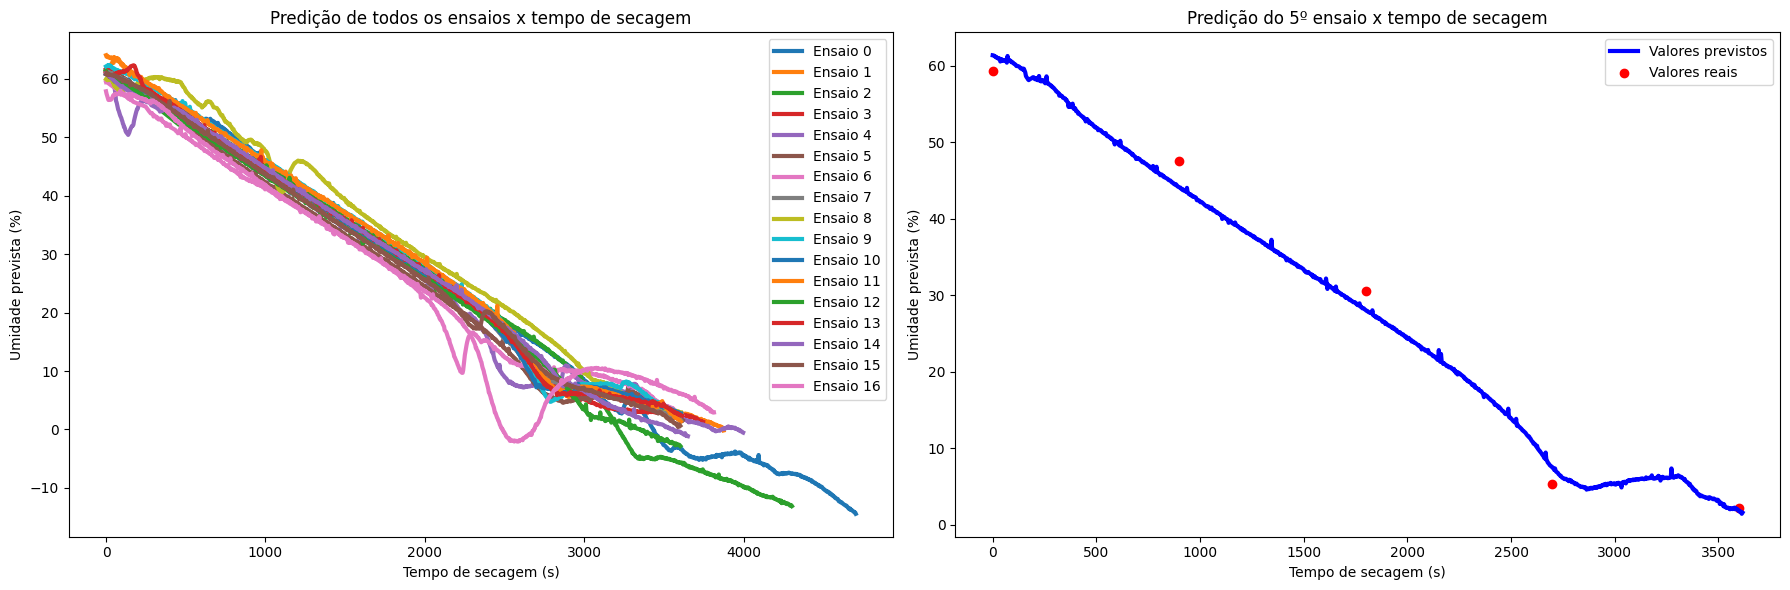

Timeless dataframe

Best model: Lasso(alpha=10, precompute=True, random_state=1, tol=0.001, warm_start=True)
Score: 40.10%



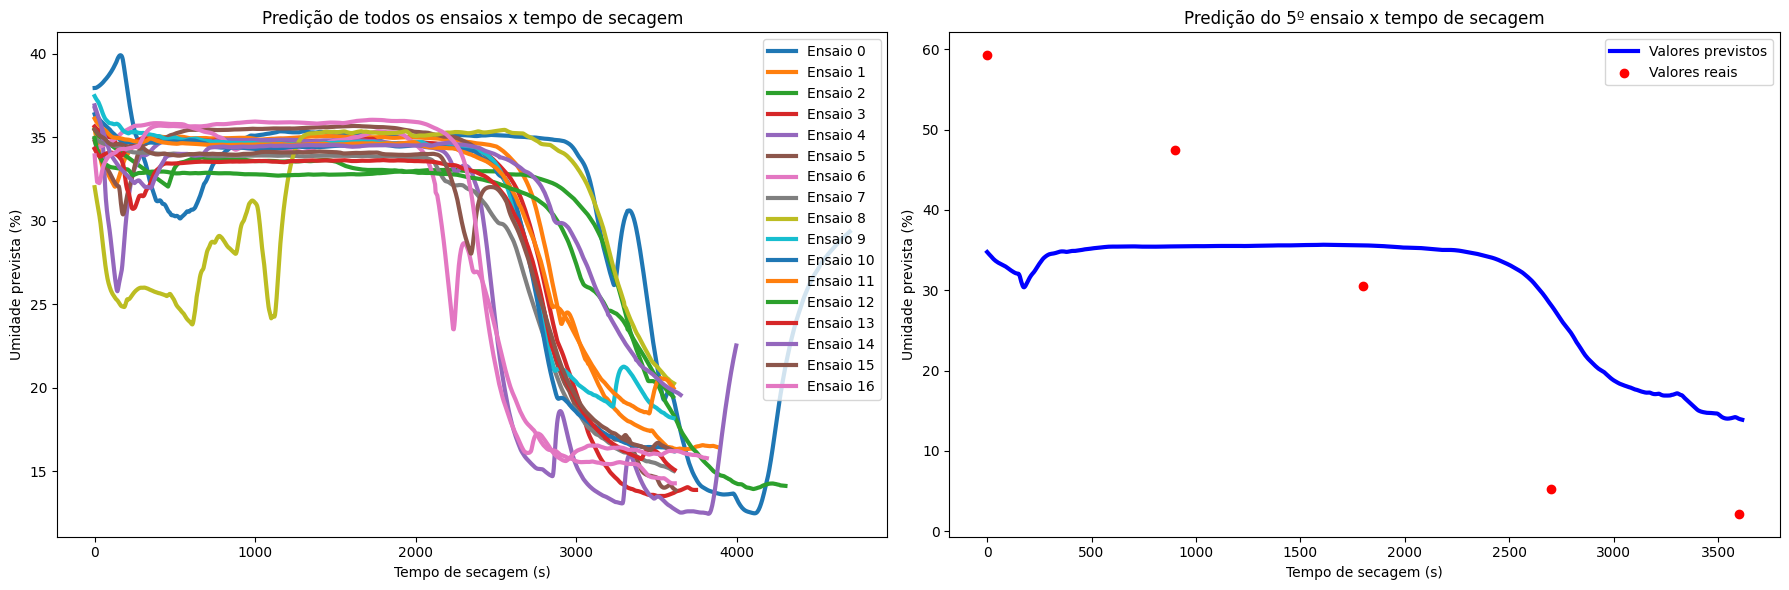

T-1 dataframe

Best model: Lasso(alpha=0.1, random_state=1, selection='random', tol=1e-05, warm_start=True)
Score: 95.02%



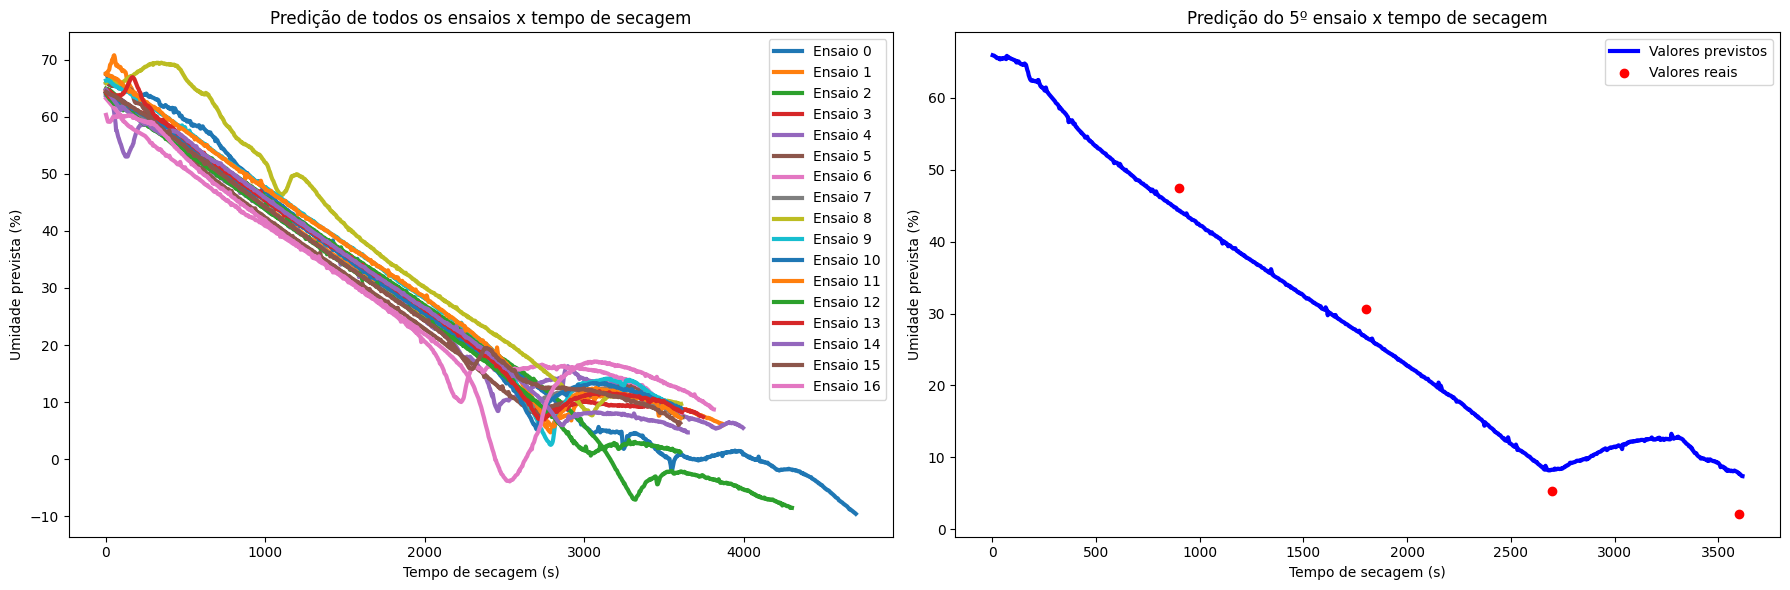

T-2 dataframe

Best model: Lasso(copy_X=False, random_state=1, tol=1e-05, warm_start=True)
Score: 84.60%



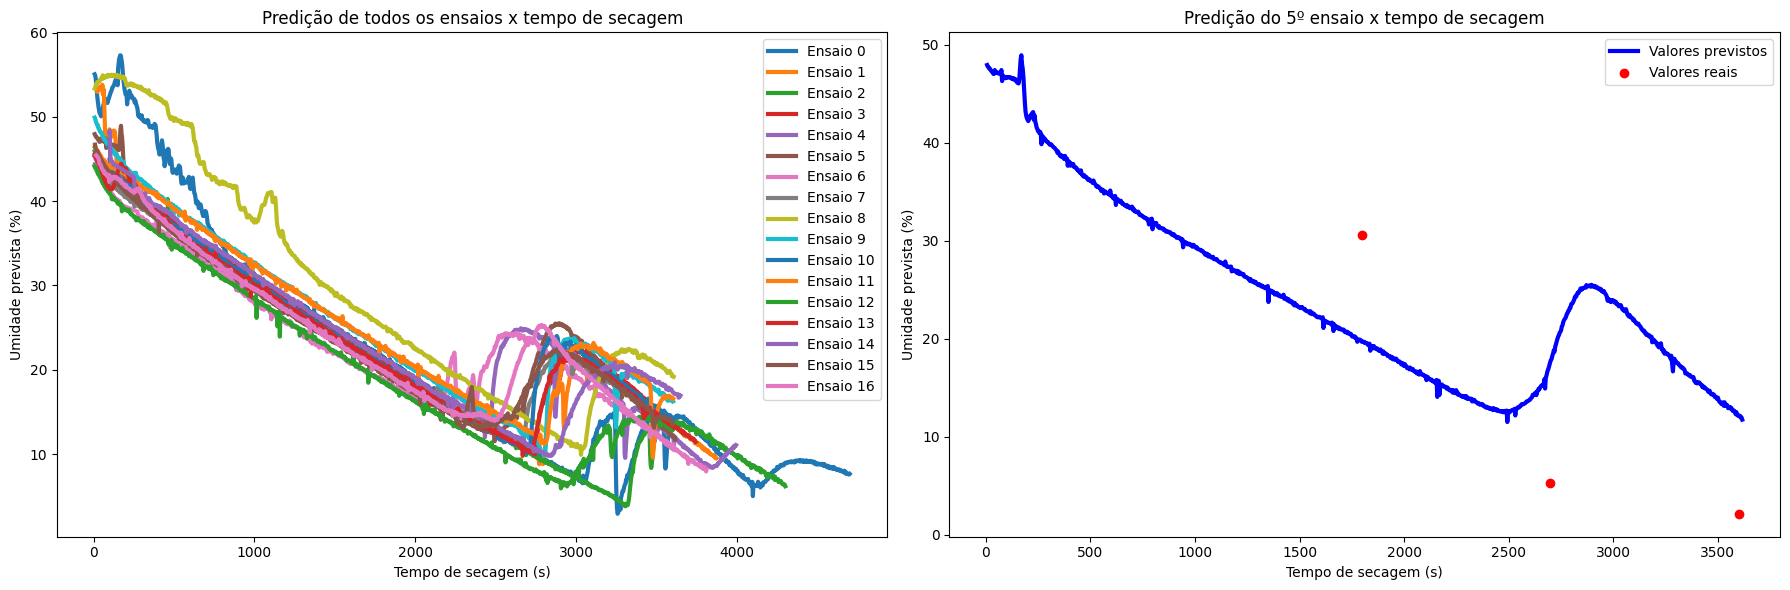

In [33]:
from sklearn.linear_model import Lasso

base_estimator = Lasso(max_iter=1000, random_state=1)
param_grid = {
    'alpha': [0.1, 1.0, 10],
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False],
    'precompute': [True, False],
    'selection': ['cyclic', 'random'],
    'tol': [0.00001, 0.0001, 0.001],
    'warm_start': [True, False],
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### Huber Regressor

In [34]:
from sklearn.linear_model import HuberRegressor
HuberRegressor().get_params()

{'alpha': 0.0001,
 'epsilon': 1.35,
 'fit_intercept': True,
 'max_iter': 100,
 'tol': 1e-05,
 'warm_start': False}

Standard dataframe

Best model: HuberRegressor(alpha=0.001, max_iter=1000, tol=0.0001, warm_start=True)
Score: 96.13%



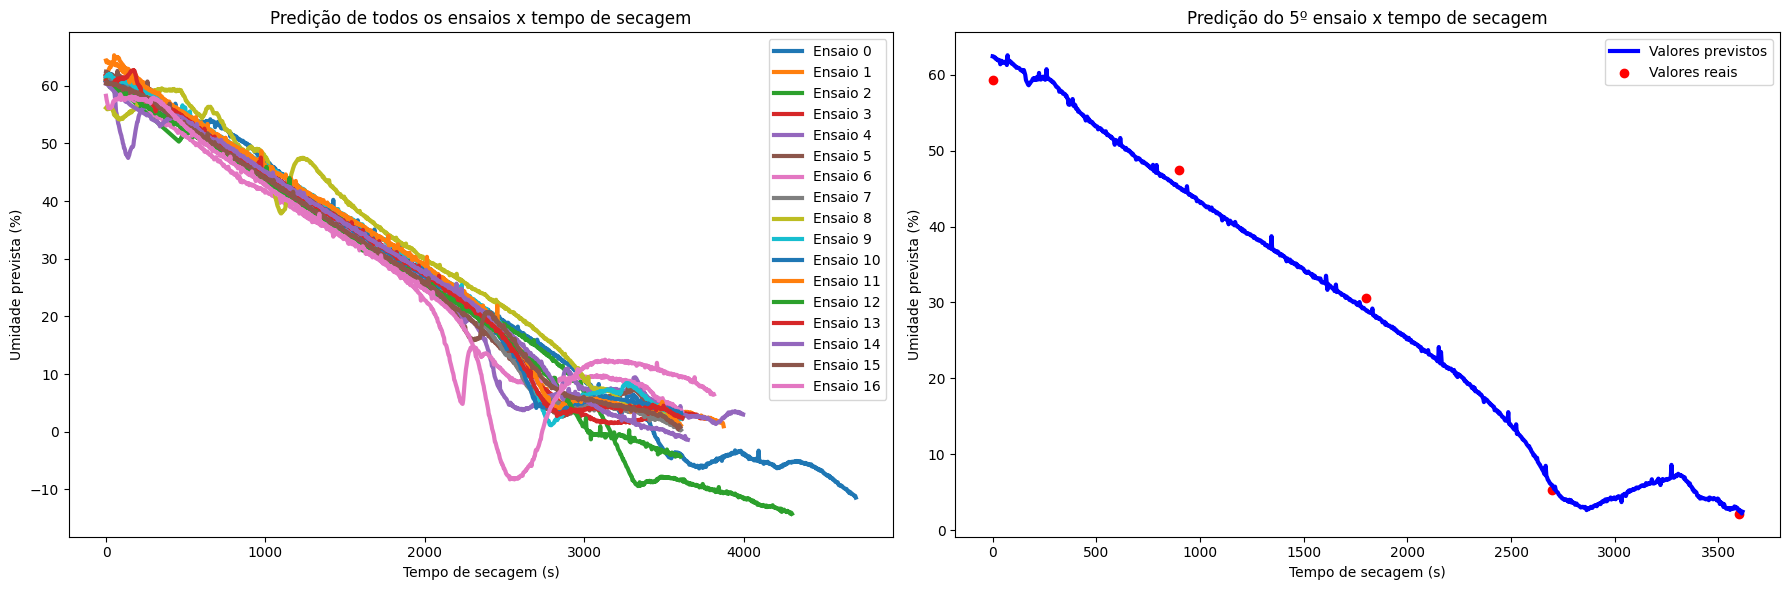

Timeless dataframe

Best model: HuberRegressor(alpha=0.001, max_iter=1000, tol=0.0001, warm_start=True)
Score: 67.36%



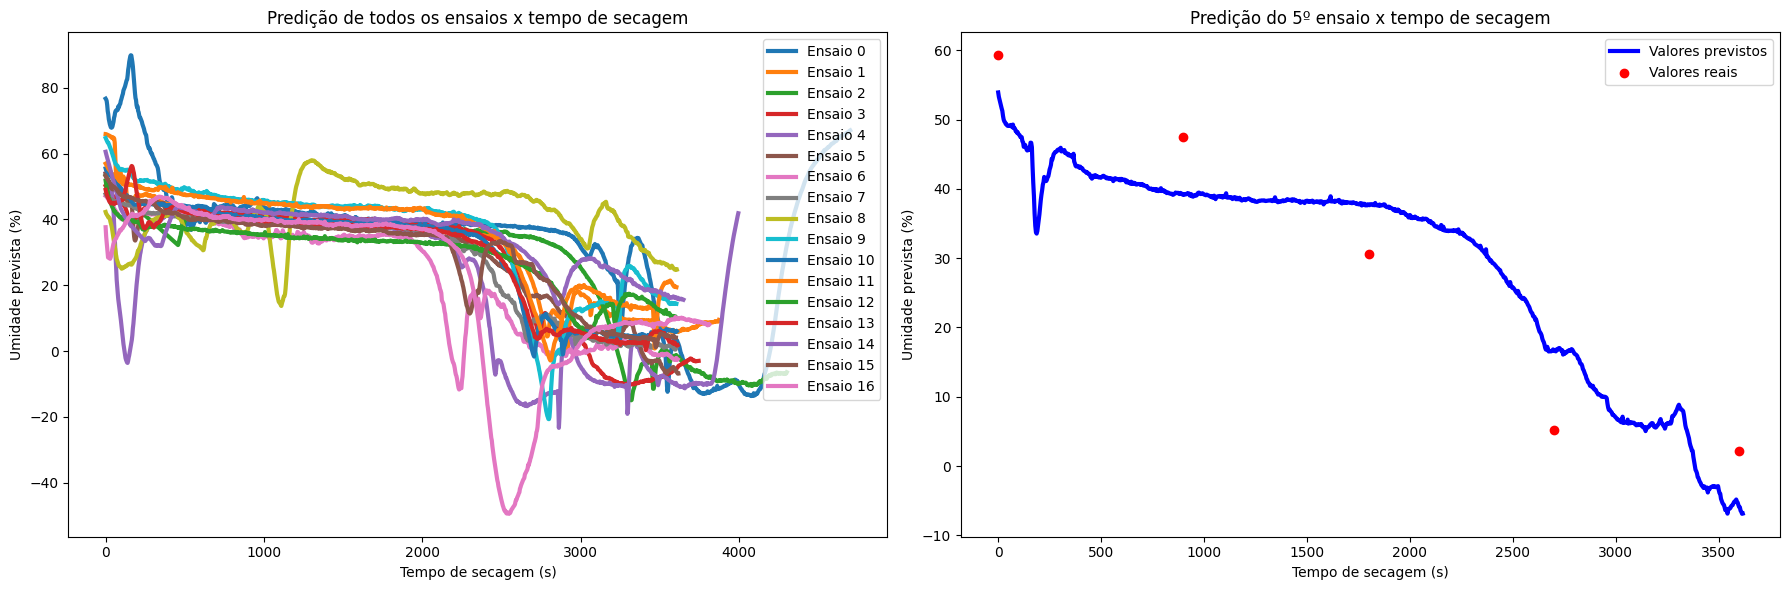

T-1 dataframe

Best model: HuberRegressor(alpha=0.001, max_iter=1000)
Score: 94.92%



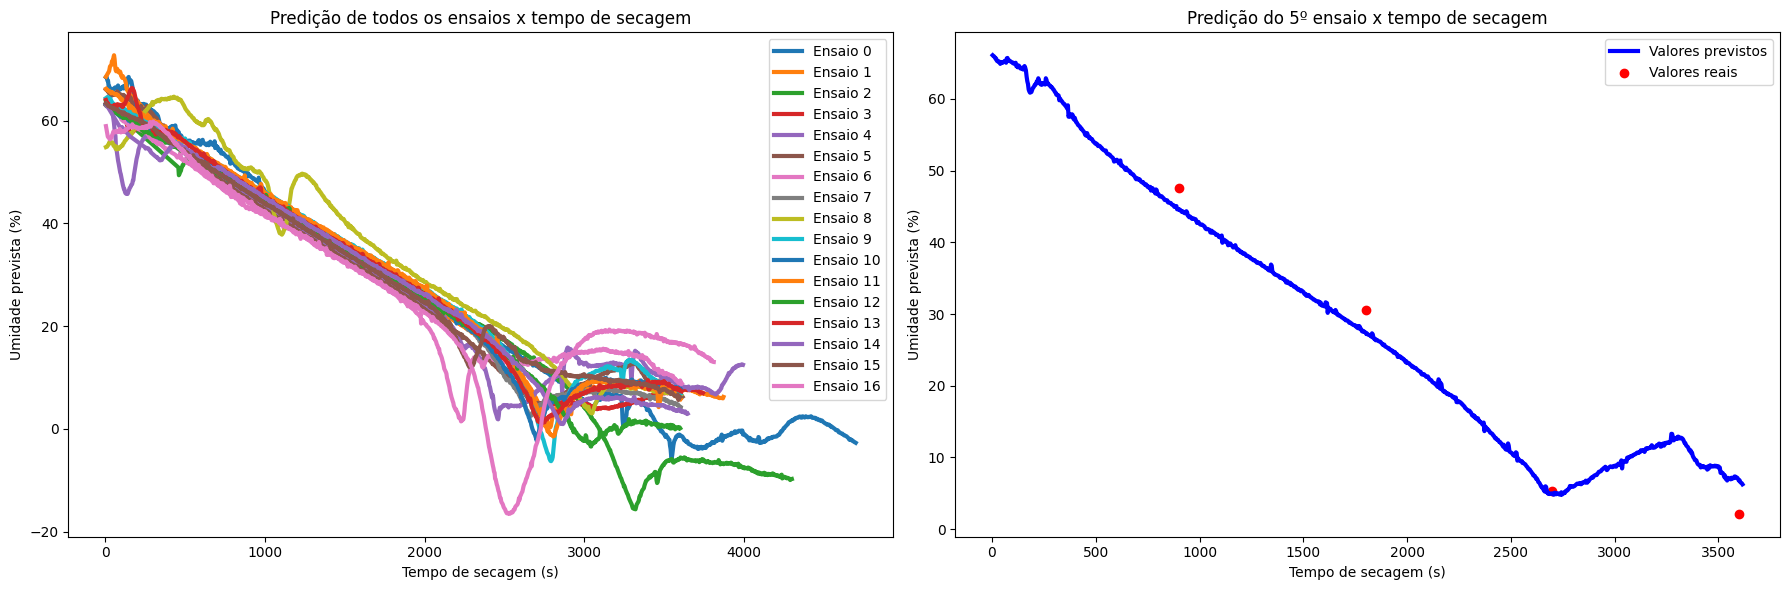

T-2 dataframe

Best model: HuberRegressor(alpha=0.001, max_iter=1000)
Score: 81.61%



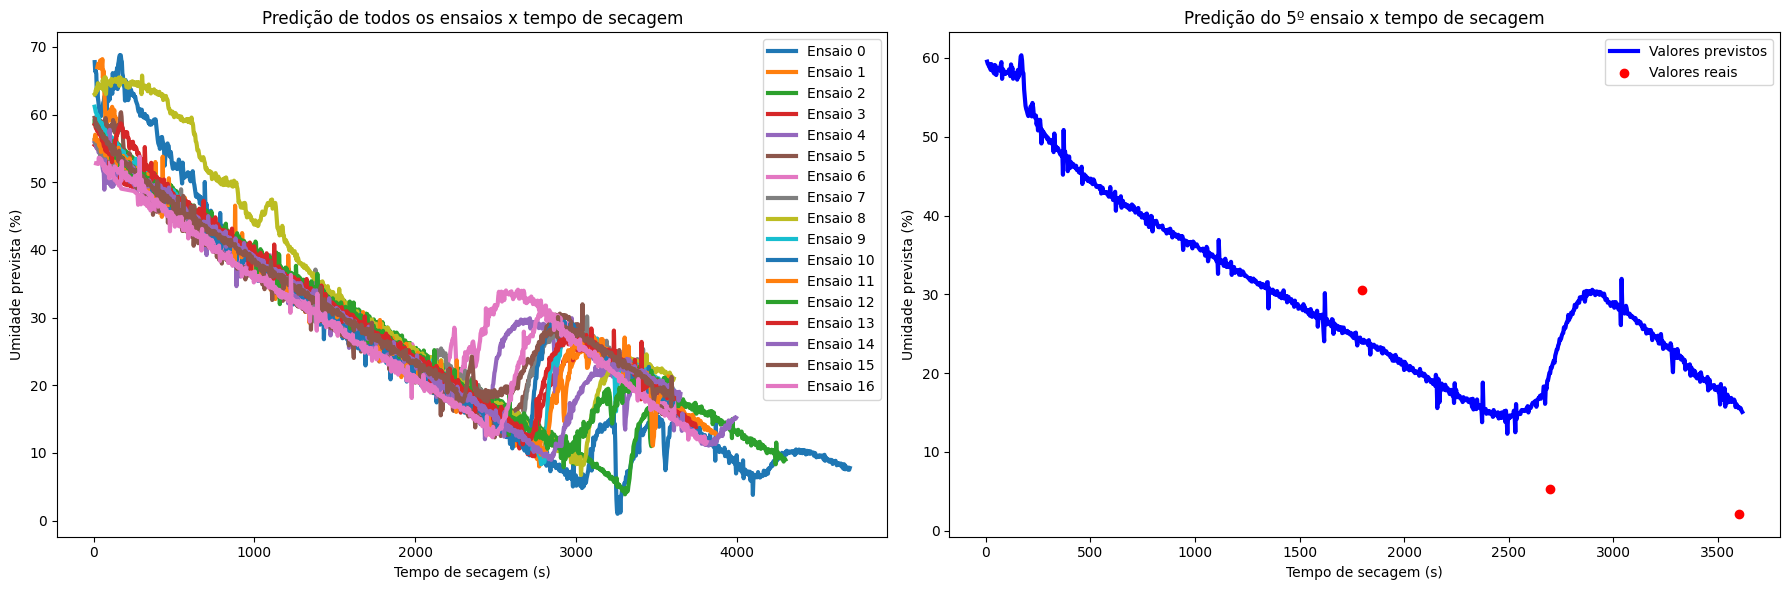

In [35]:
from sklearn.linear_model import HuberRegressor

base_estimator = HuberRegressor(max_iter=1000)
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001],
    'fit_intercept': [True, False],
    'tol': [1e-06, 1e-05, 1e-04],
    'warm_start': [True, False]
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Standard dataframe

Best model: LinearRegression(copy_X=False, n_jobs=True)
Score: 96.40%



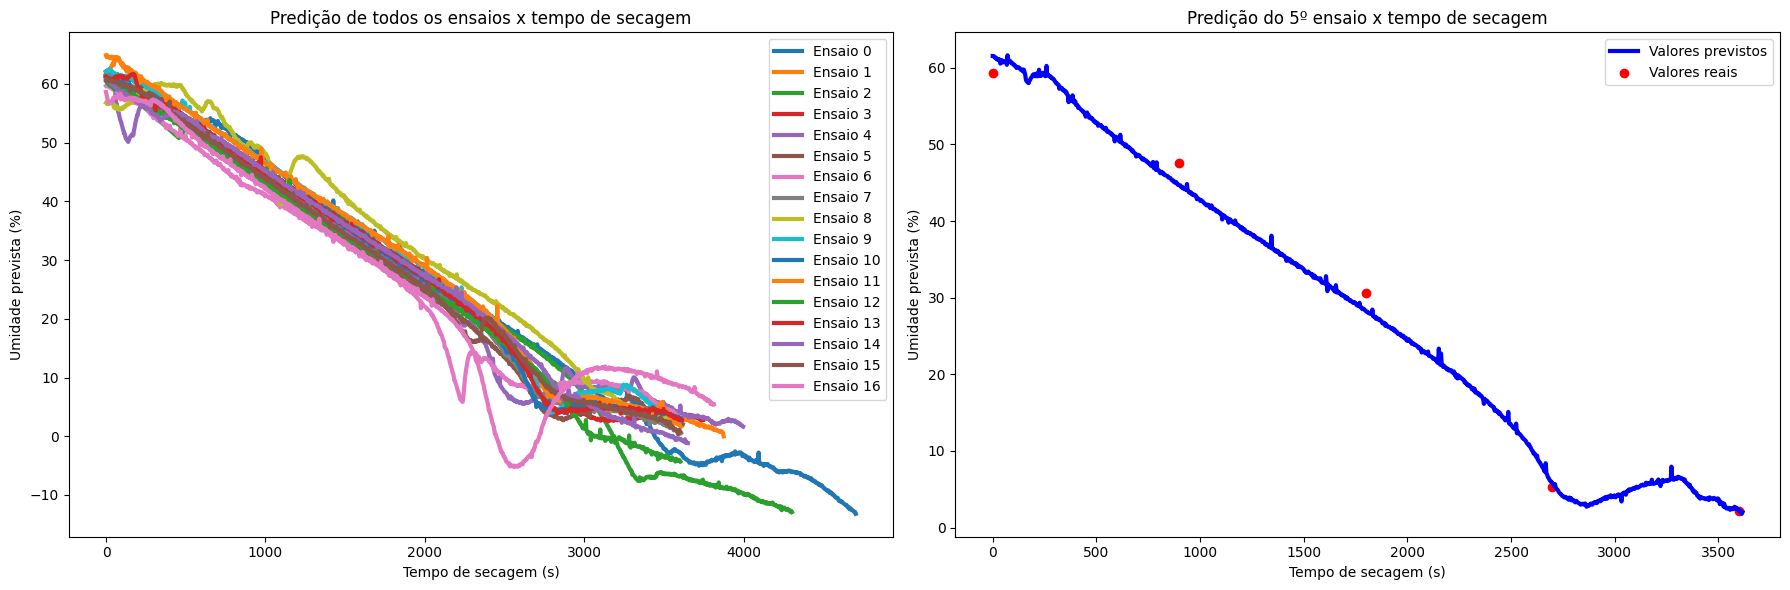

Timeless dataframe

Best model: LinearRegression(n_jobs=2)
Score: 67.46%



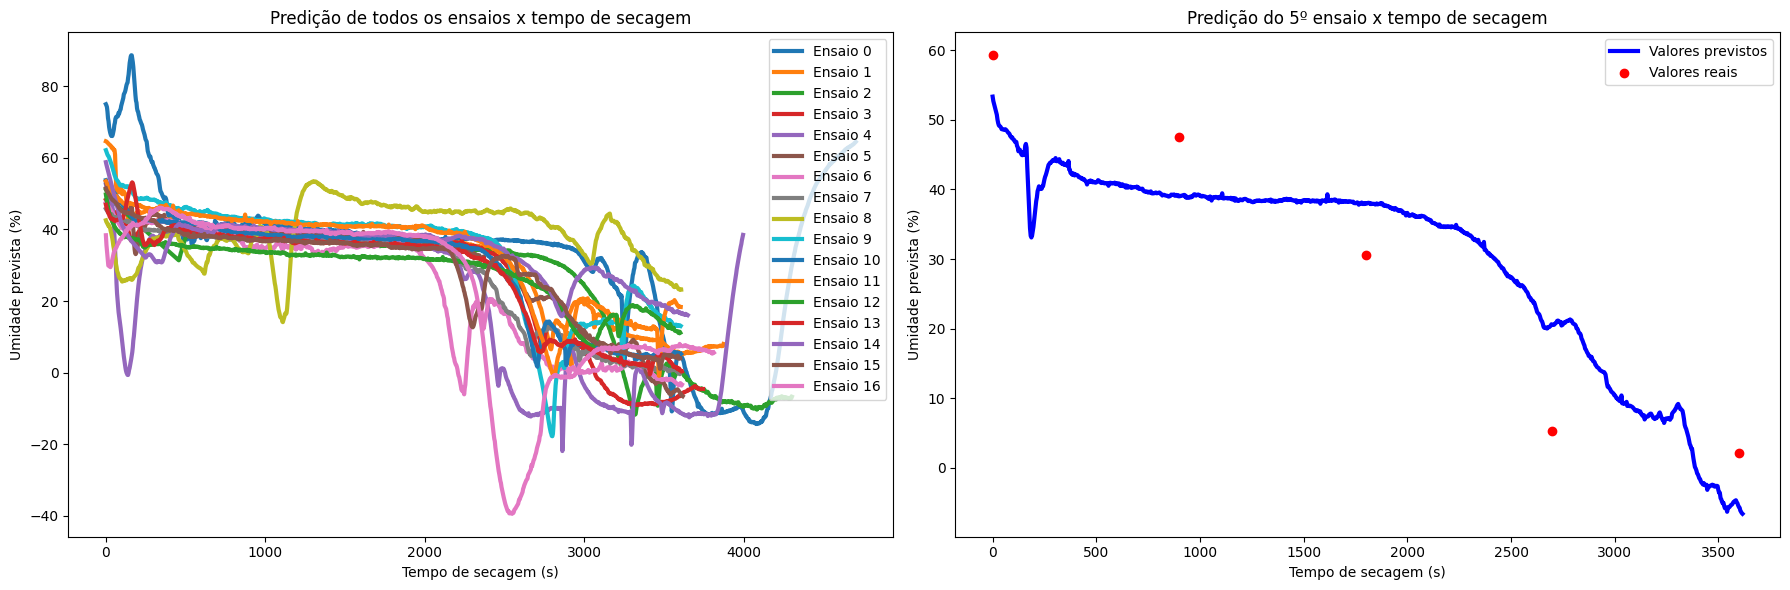

T-1 dataframe

Best model: LinearRegression(copy_X=False, n_jobs=True)
Score: 94.94%



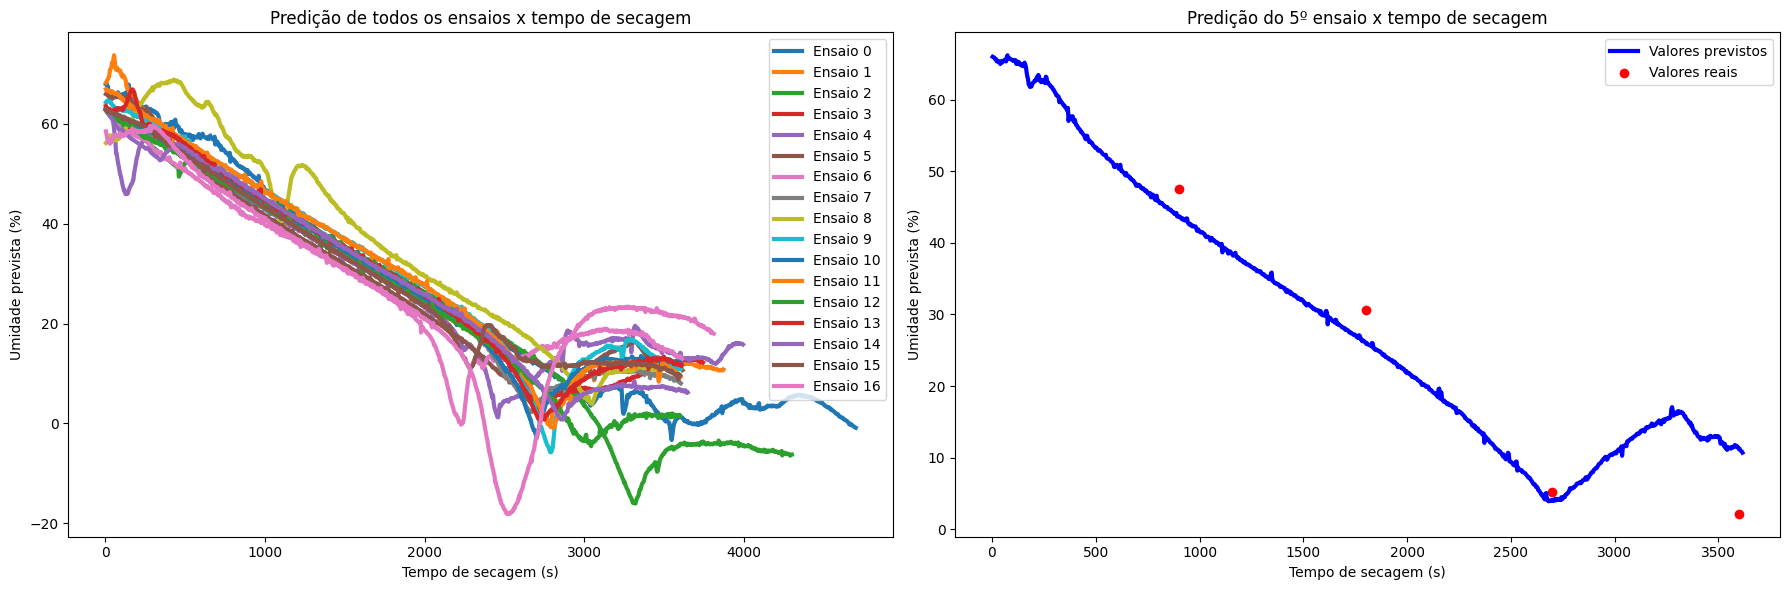

T-2 dataframe

Best model: LinearRegression(copy_X=False, n_jobs=2)
Score: 87.06%



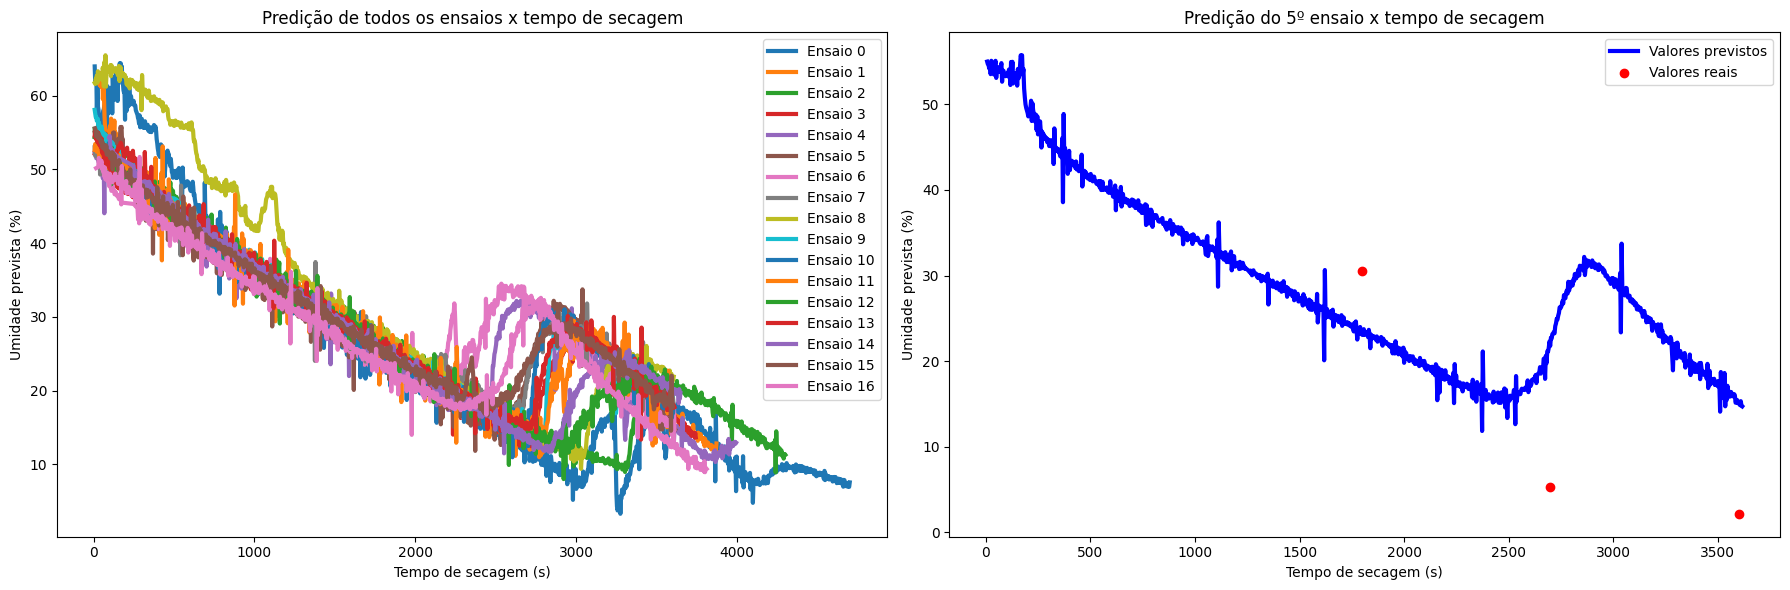

In [37]:
from sklearn.linear_model import LinearRegression

base_estimator = LinearRegression()
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [None, 2, True],
    'positive': [True, False]
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### Lars

In [38]:
from sklearn.linear_model import Lars
Lars().get_params()

{'copy_X': True,
 'eps': 2.220446049250313e-16,
 'fit_intercept': True,
 'fit_path': True,
 'jitter': None,
 'n_nonzero_coefs': 500,
 'normalize': 'deprecated',
 'precompute': 'auto',
 'random_state': None,
 'verbose': False}

Standard dataframe

Best model: Lars(n_nonzero_coefs=1000, random_state=1)
Score: 96.40%



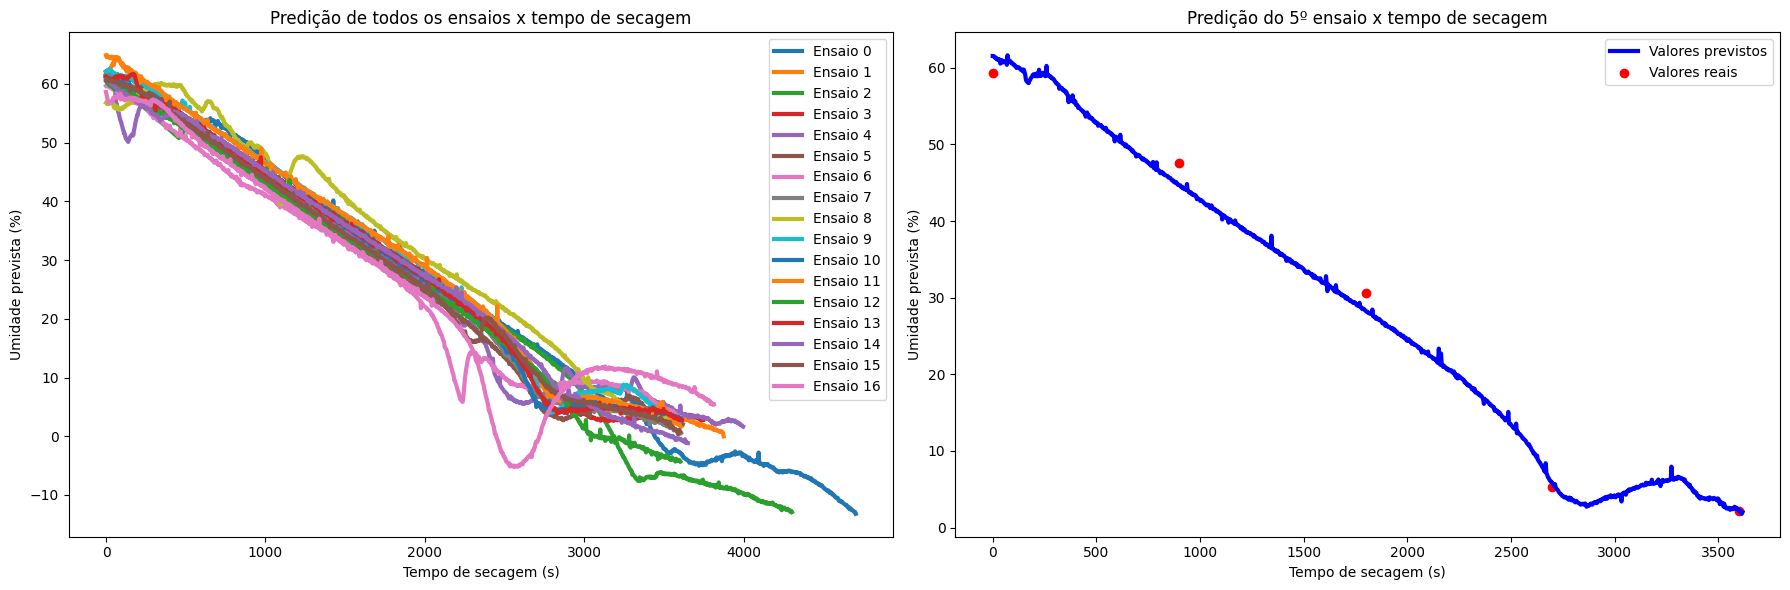

Timeless dataframe

Best model: Lars(n_nonzero_coefs=250, random_state=1)
Score: 66.80%



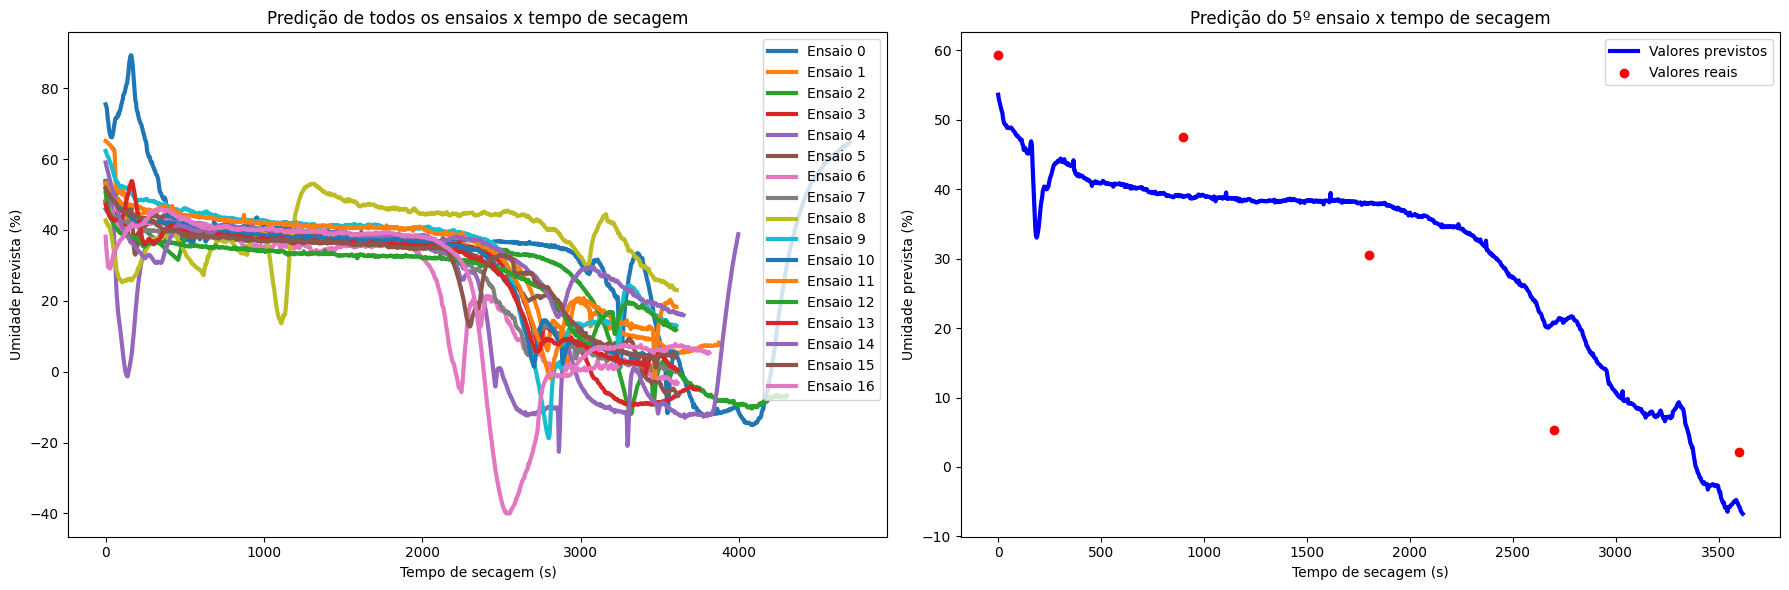

T-1 dataframe

Best model: Lars(copy_X=False, fit_path=False, n_nonzero_coefs=250, random_state=1)
Score: 50.42%



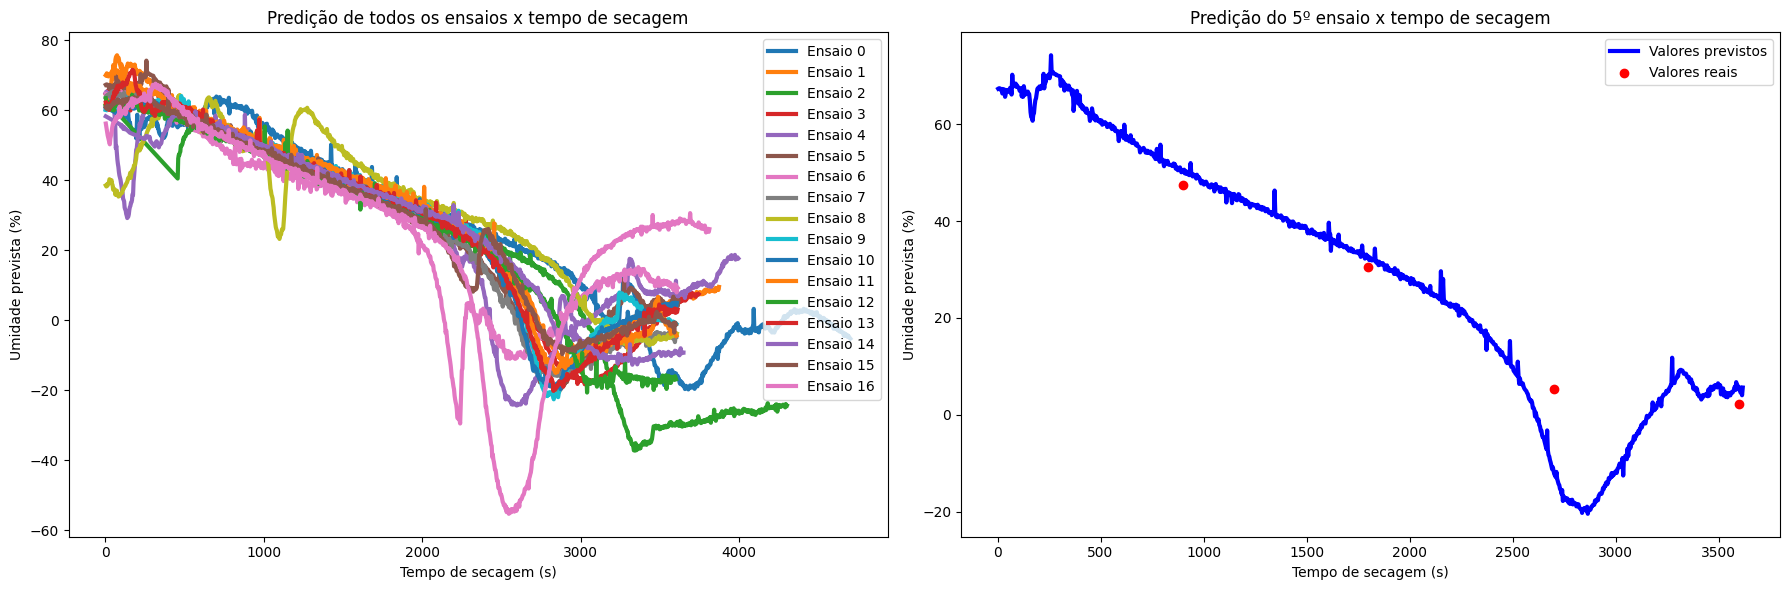

T-2 dataframe

Best model: Lars(copy_X=False, n_nonzero_coefs=1000, random_state=1)
Score: -2495.37%



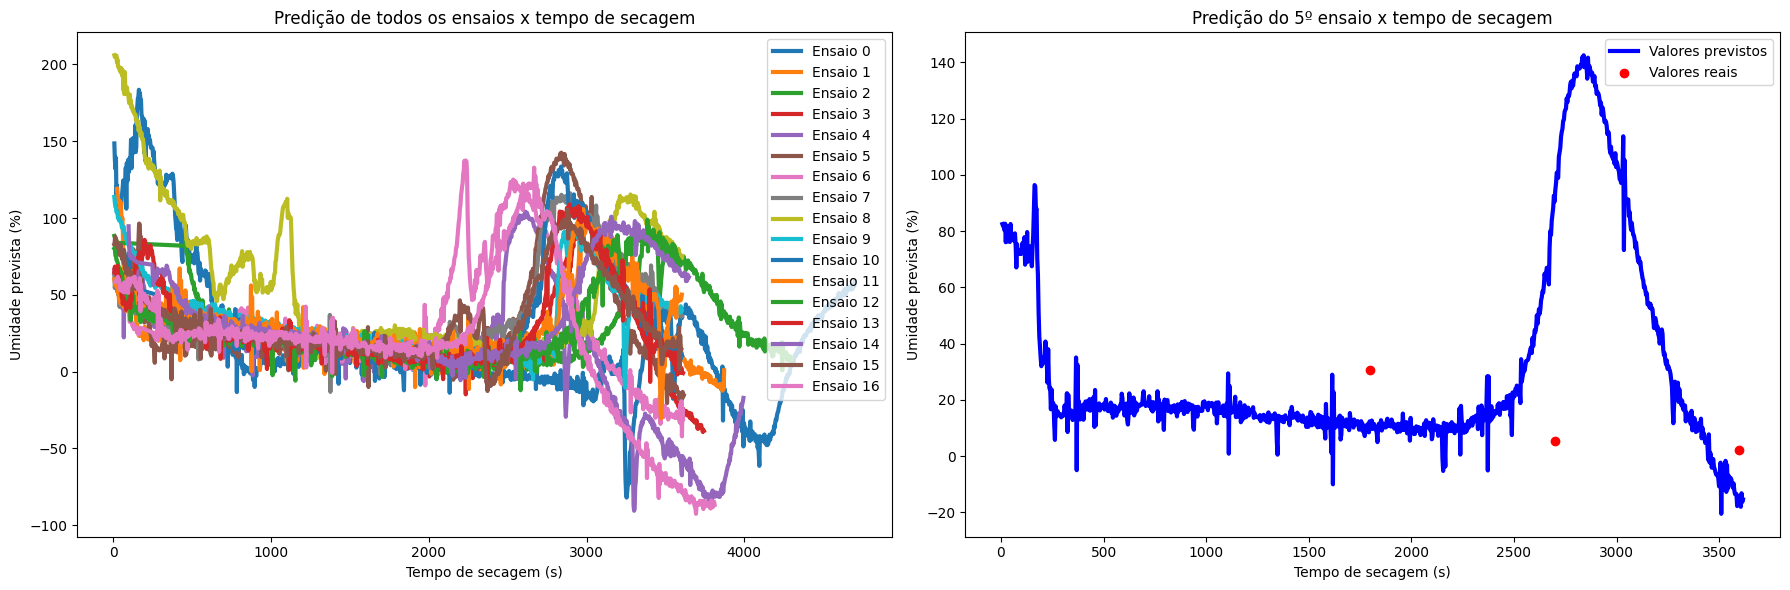

In [39]:
from sklearn.linear_model import Lars

base_estimator = Lars(random_state=1)
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'fit_path': [True, False],
    'n_nonzero_coefs': [250, 500, 1000]
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### BayesianRidge

In [40]:
from sklearn.linear_model import BayesianRidge
BayesianRidge().get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'tol': 0.001,
 'verbose': False}

Standard dataframe

Best model: BayesianRidge(lambda_1=1e-05, lambda_2=1e-07, lambda_init=0.1, tol=0.0001)
Score: 96.53%



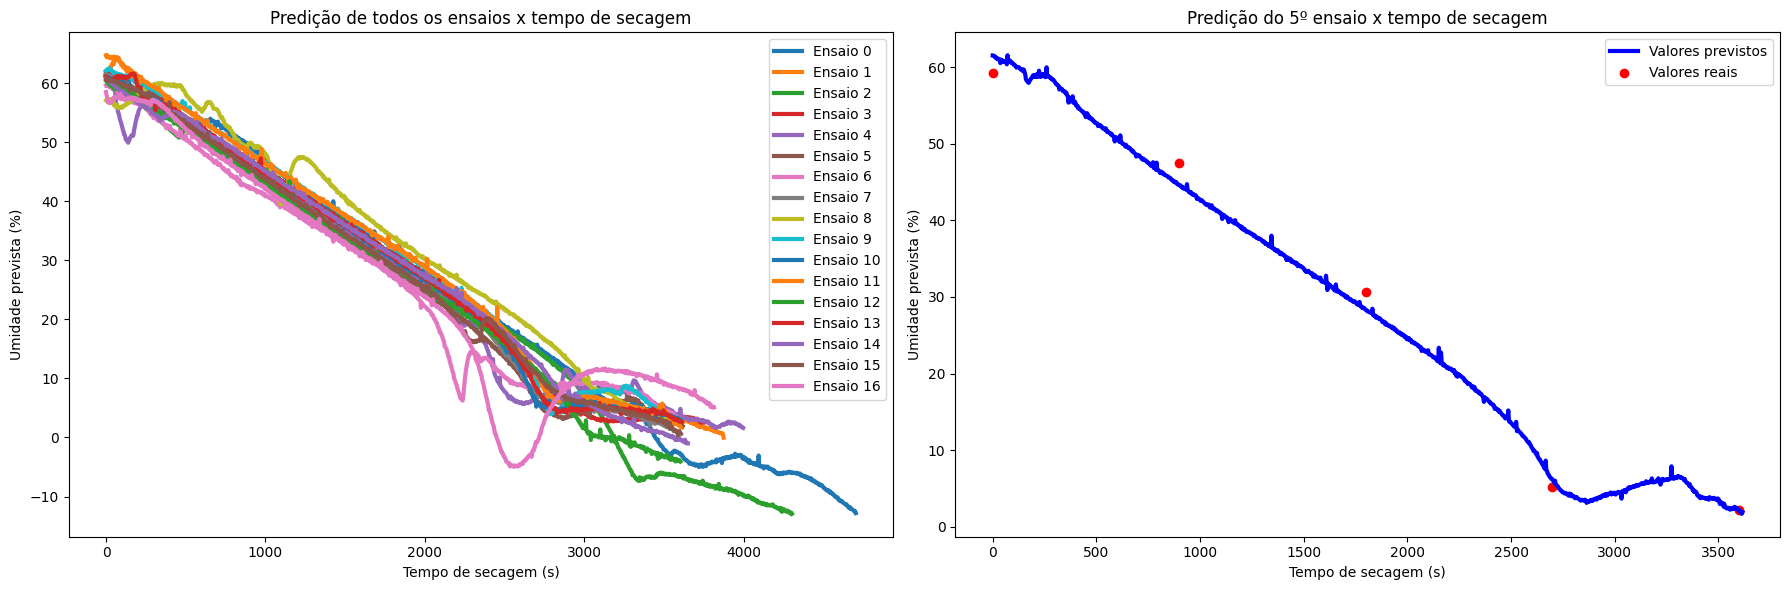

Timeless dataframe

Best model: BayesianRidge(alpha_1=1e-07, alpha_2=1e-07, copy_X=False, lambda_1=1e-07,
              lambda_2=1e-07, lambda_init=0.1, tol=0.01)
Score: 68.63%



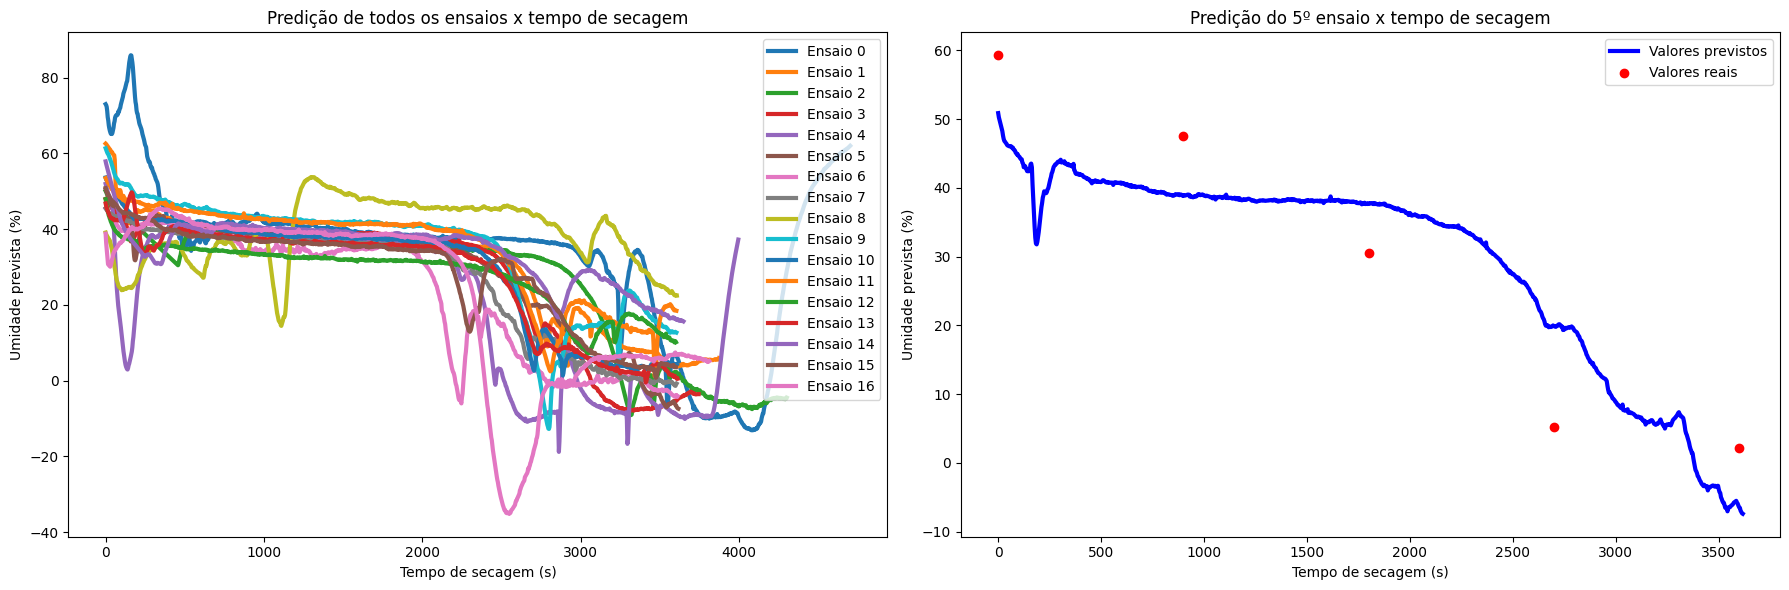

T-1 dataframe

Best model: BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, compute_score=True, lambda_1=1e-05,
              lambda_2=1e-05, lambda_init=1, tol=0.0001)
Score: 95.16%



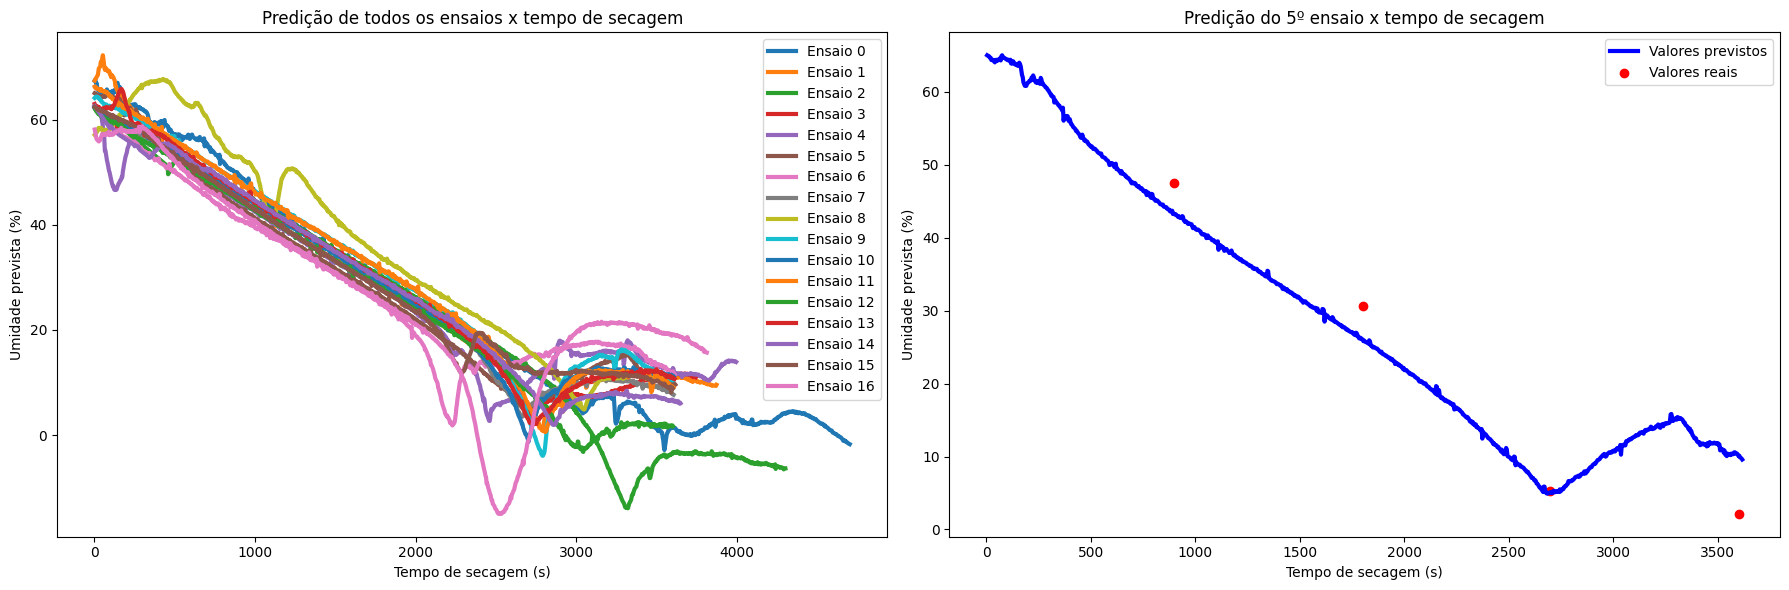

T-2 dataframe

Best model: BayesianRidge(alpha_2=1e-07, compute_score=True, lambda_1=1e-05, lambda_2=1e-07,
              lambda_init=10, tol=0.01)
Score: 89.14%



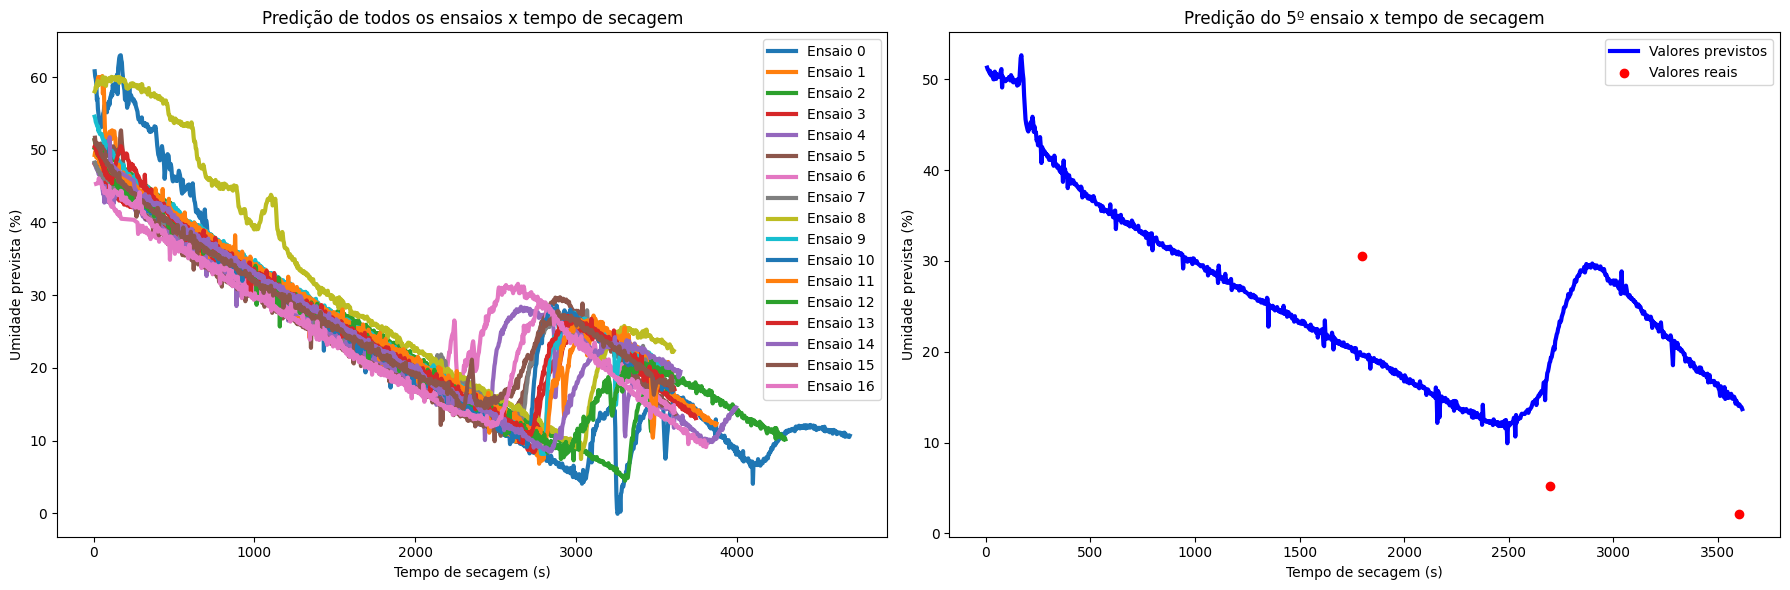

In [41]:
from sklearn.linear_model import BayesianRidge

base_estimator = BayesianRidge()
param_grid = {
    'alpha_1': [1e-07, 1e-06, 1e-05],
    'alpha_2': [1e-07, 1e-06, 1e-05],
    'compute_score': [True, False],
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'lambda_1': [1e-07, 1e-06, 1e-05],
    'lambda_2': [1e-07, 1e-06, 1e-05],
    'lambda_init': [0.1, 1, 10],
    'tol': [0.0001, 0.001, 0.01],
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### Ridge

In [42]:
from sklearn.linear_model import Ridge
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

Standard dataframe

Best model: Ridge(max_iter=1000, random_state=1, tol=1e-05)
Score: 96.74%



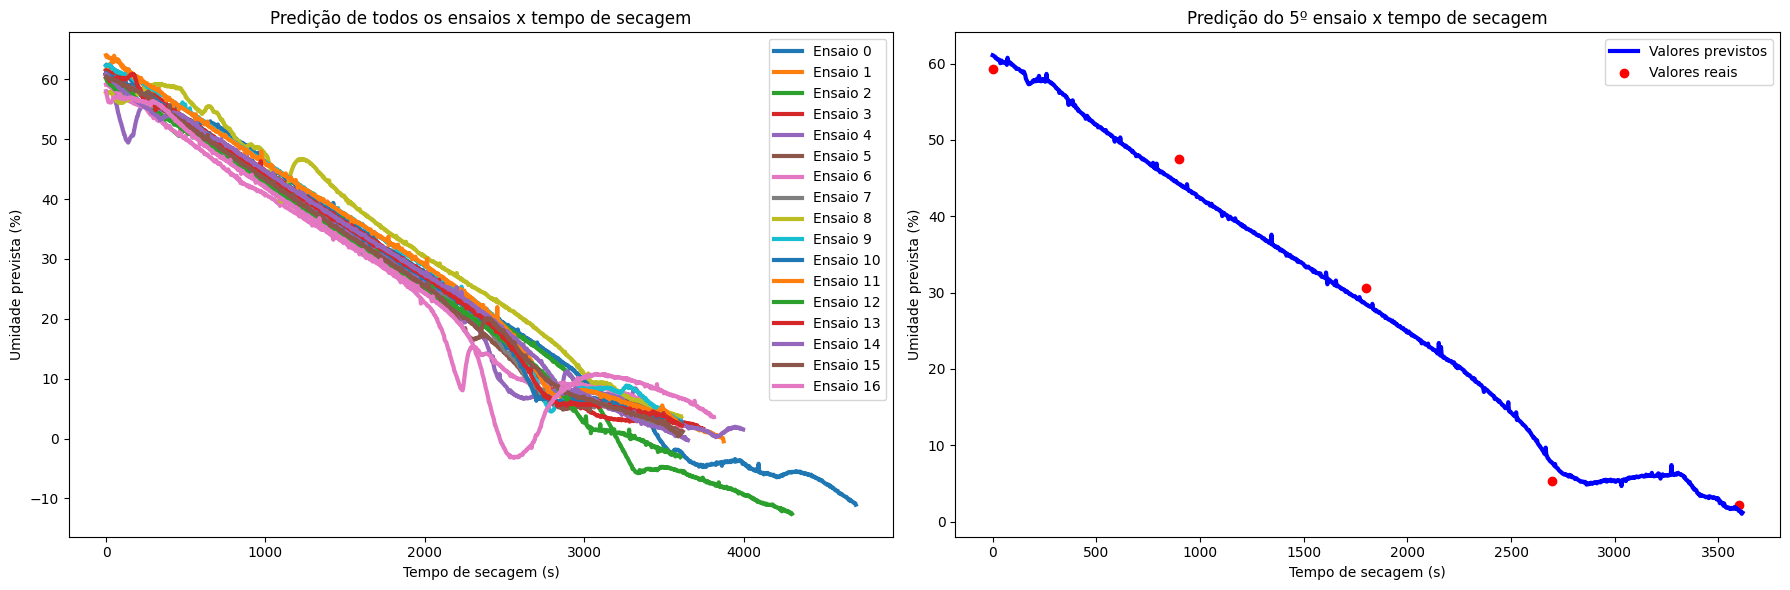

Timeless dataframe

Best model: Ridge(alpha=0.1, copy_X=False, max_iter=1000, random_state=1, tol=0.001)
Score: 68.12%



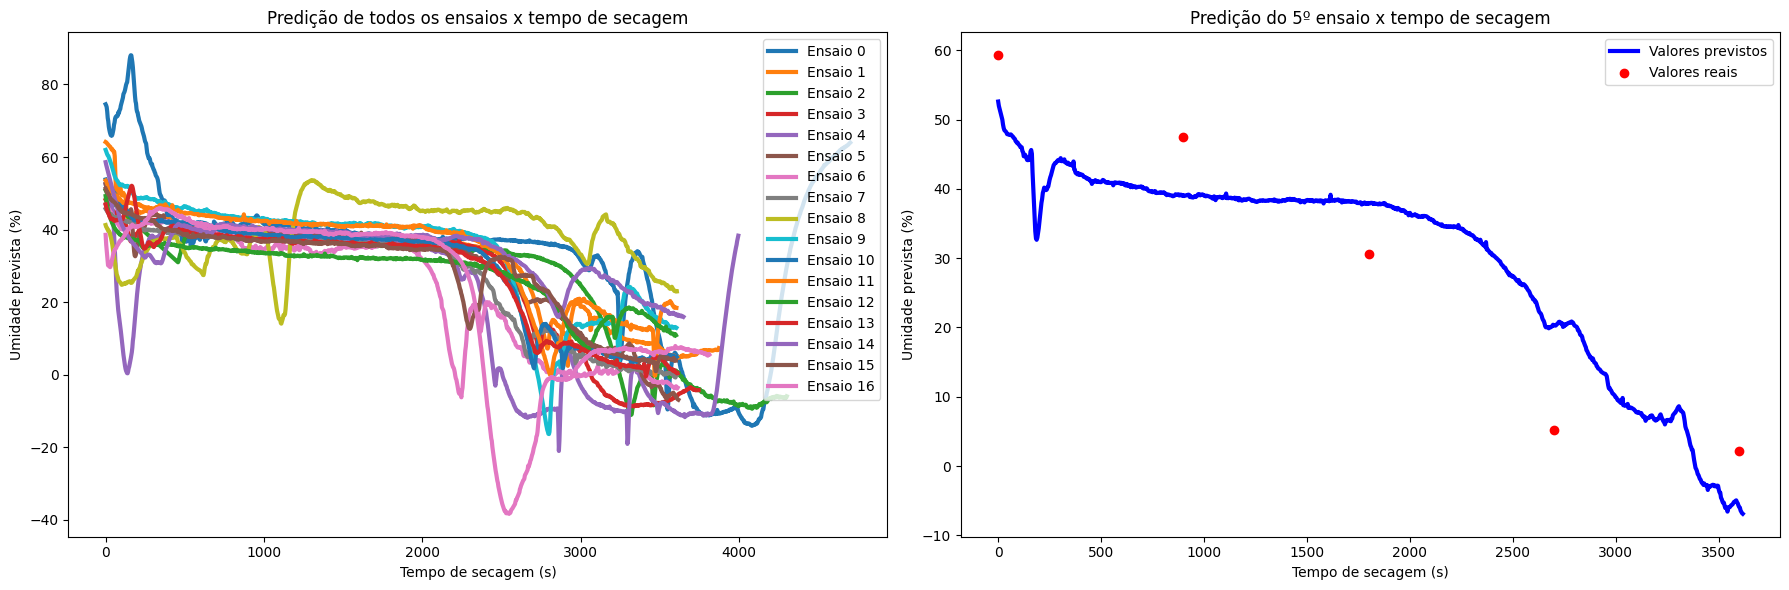

T-1 dataframe

Best model: Ridge(copy_X=False, max_iter=1000, positive=True, random_state=1, tol=0.001)
Score: 43.95%



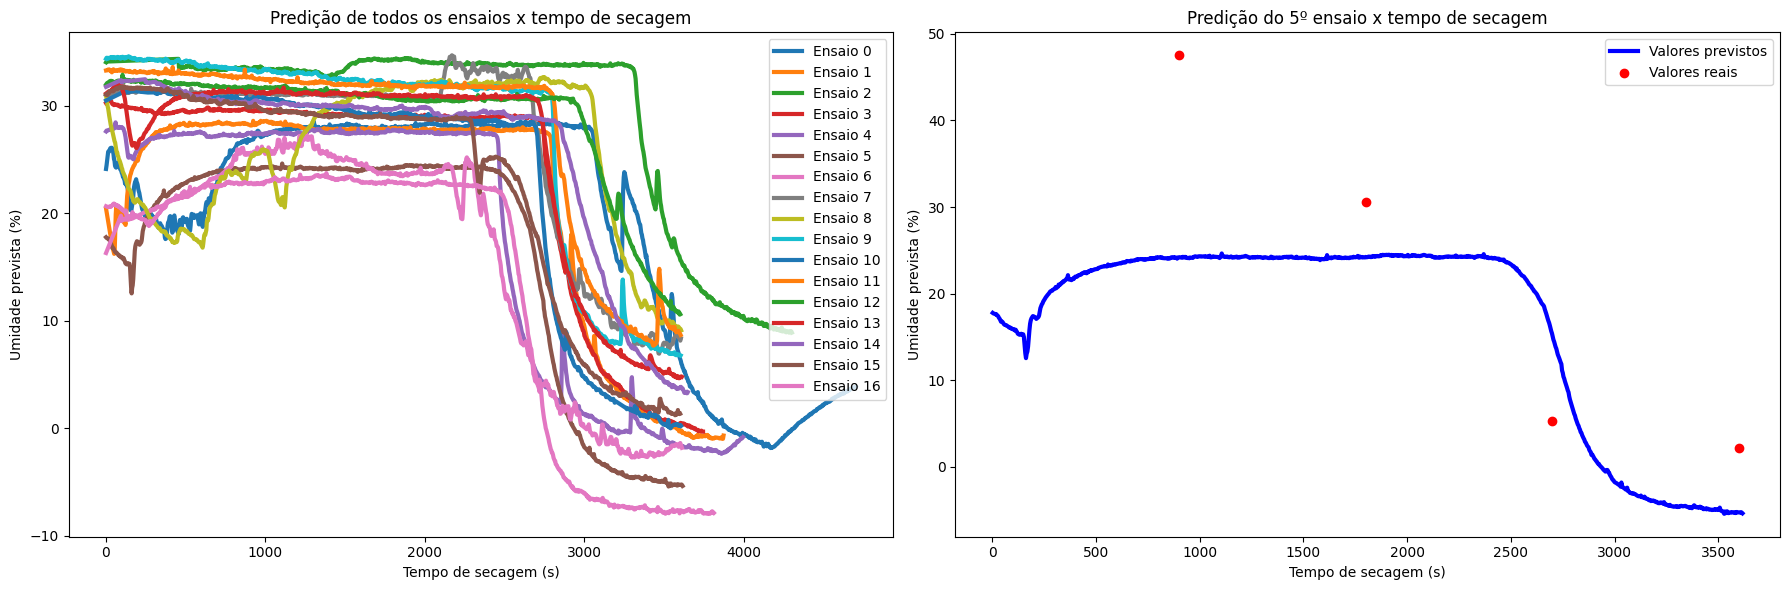

T-2 dataframe

Best model: Ridge(copy_X=False, max_iter=1000, random_state=1)
Score: 89.67%



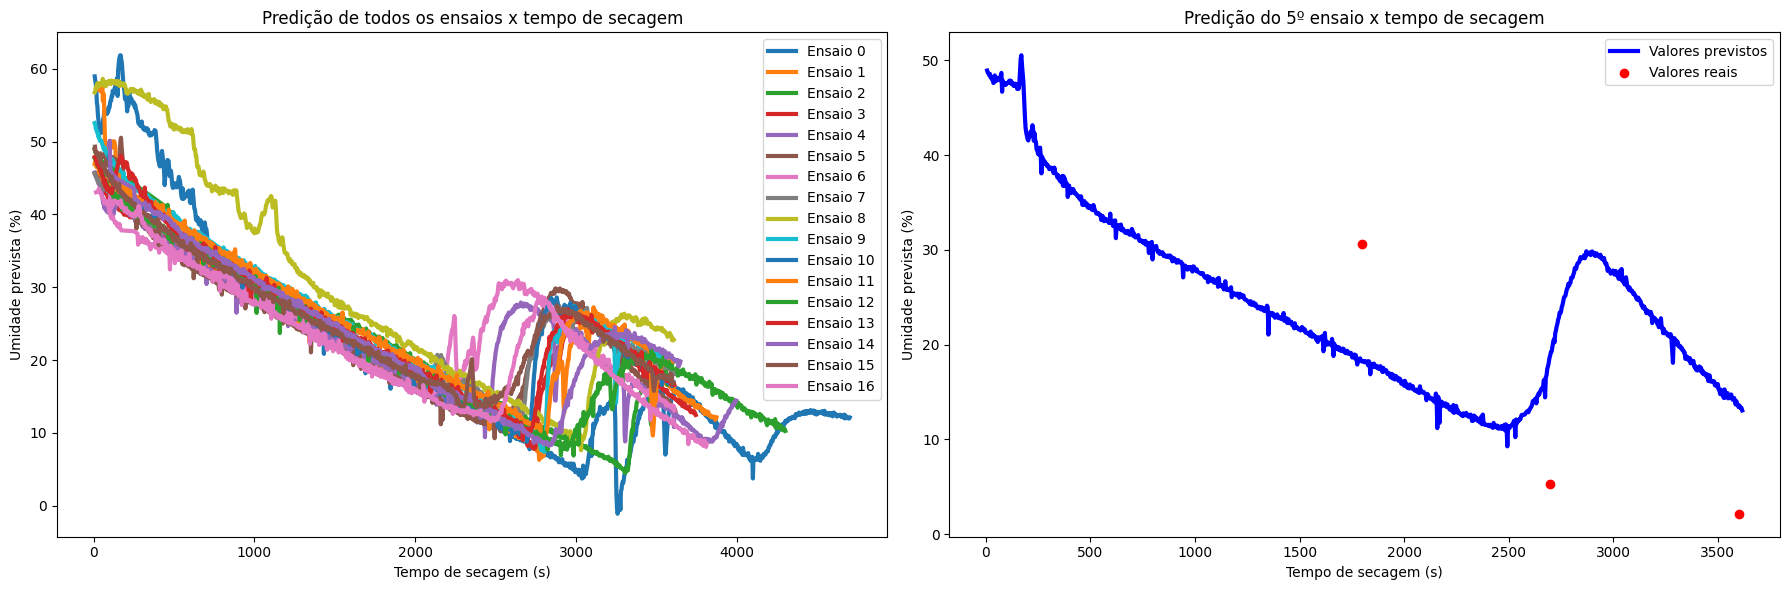

In [43]:
from sklearn.linear_model import Ridge

base_estimator = Ridge(max_iter=1000, random_state=1)
param_grid = {
    'alpha': [0.1, 1.0, 10],
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False],
    'tol': [0.00001, 0.0001, 0.001]
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### AdaBoost Regressor

In [44]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoostRegressor().get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

Standard dataframe

Best model: AdaBoostRegressor(learning_rate=0.5, loss='exponential', n_estimators=25,
                  random_state=1)
Score: 98.16%



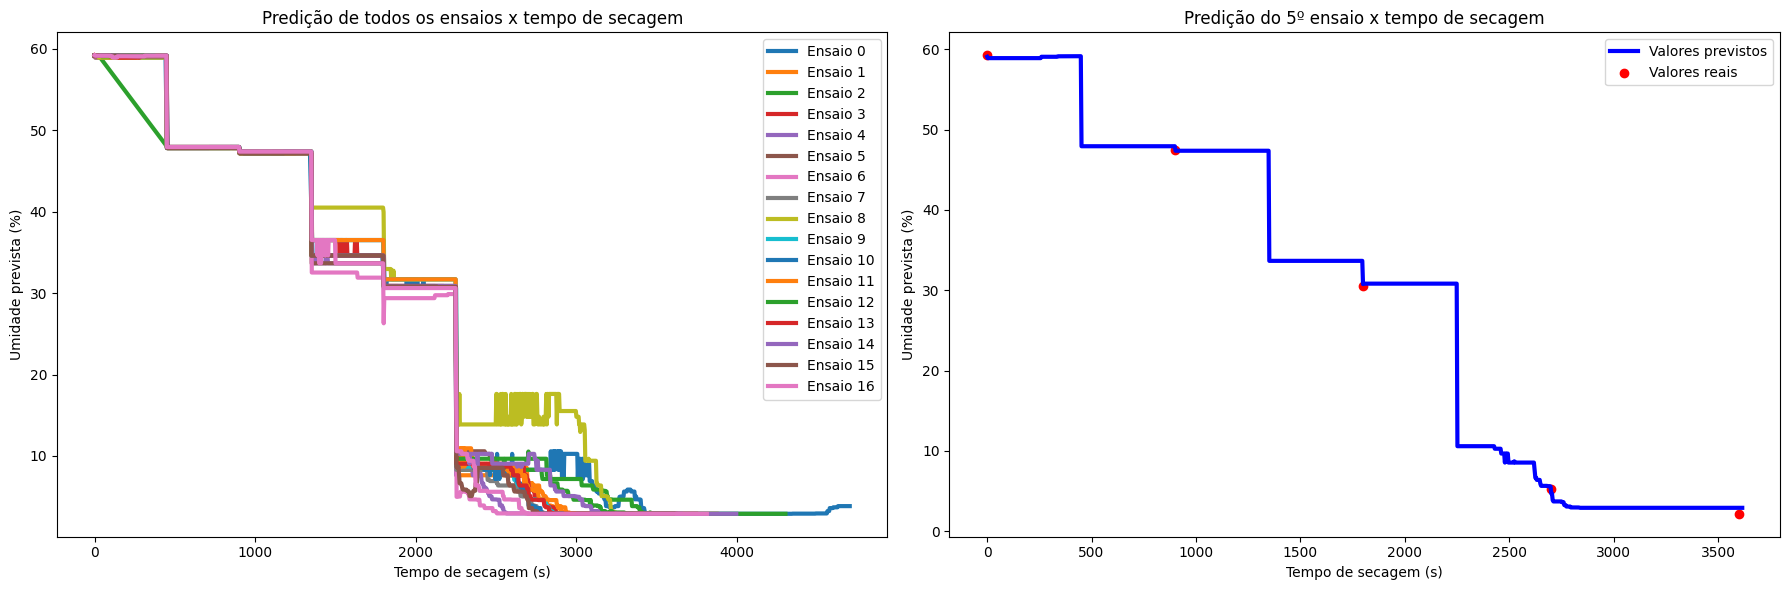

Timeless dataframe

Best model: AdaBoostRegressor(learning_rate=2, random_state=1)
Score: 80.91%



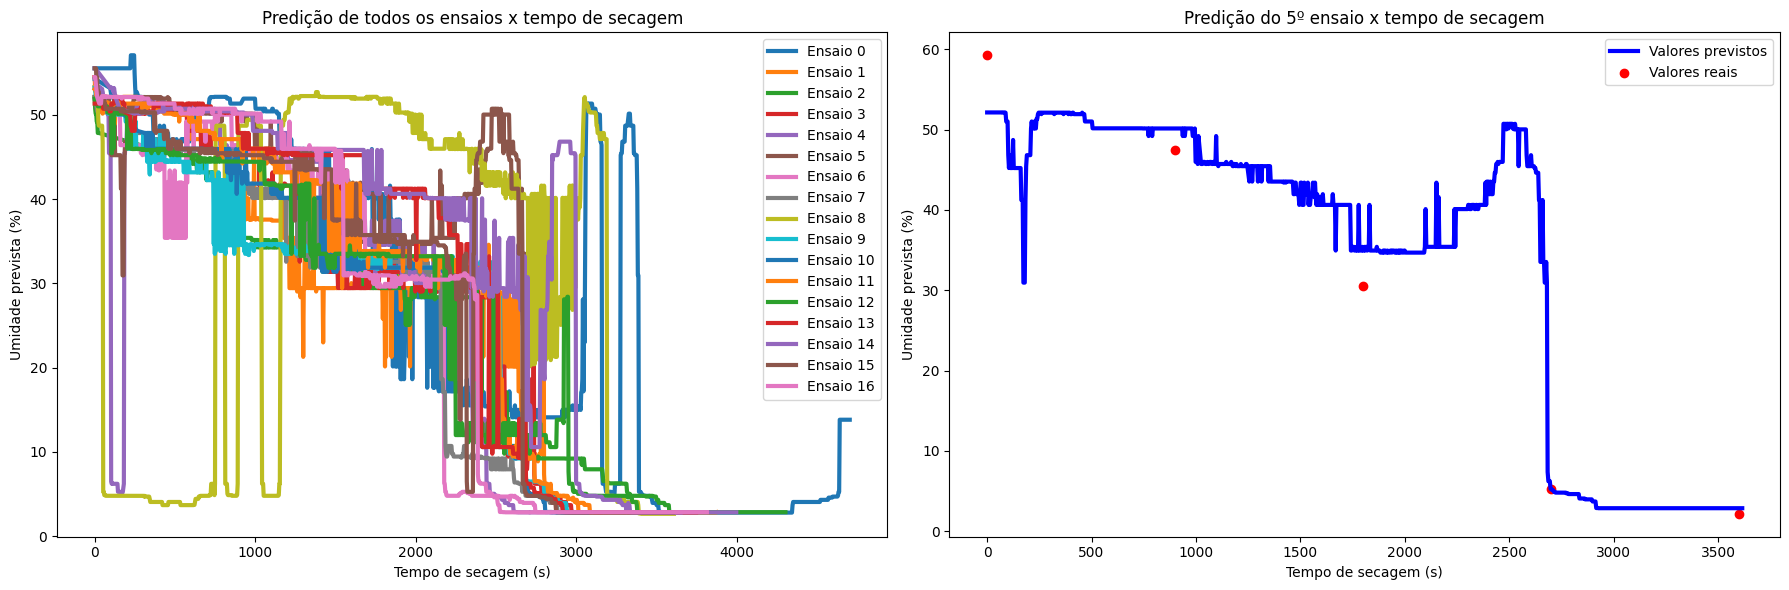

T-1 dataframe

Best model: AdaBoostRegressor(learning_rate=2, n_estimators=25, random_state=1)
Score: 97.31%



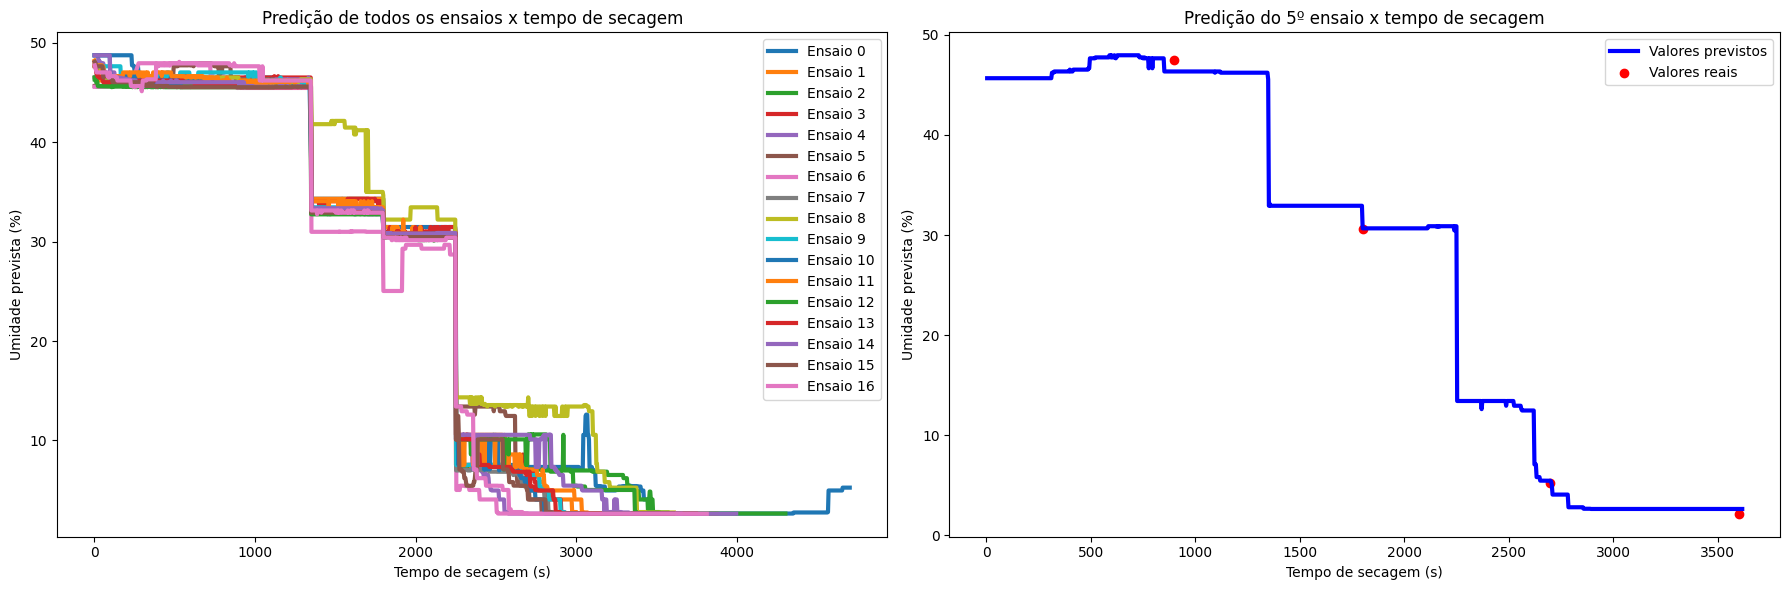

T-2 dataframe

Best model: AdaBoostRegressor(learning_rate=2, loss='exponential', random_state=1)
Score: 94.31%



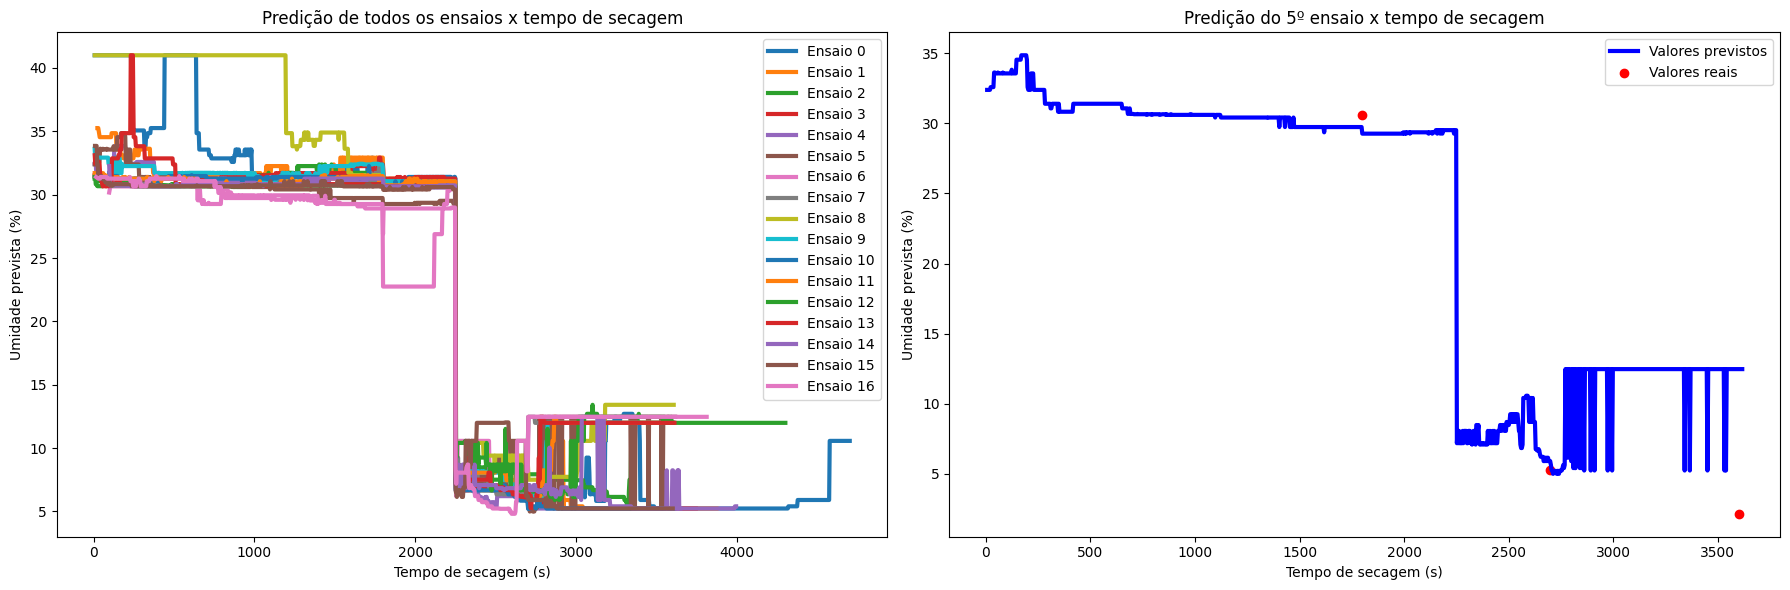

In [45]:
from sklearn.ensemble import AdaBoostRegressor

base_estimator = AdaBoostRegressor(random_state=1)
param_grid = {
    'estimator': [None], # base estimator from which the boosted ensemble is built
    # default: None is DecisionTreeRegressor initialized with max_depth=3
    'learning_rate': [0.5, 1.0, 2],
    'loss': ['linear', 'square', 'exponential'],
    'n_estimators': [25, 50, 100]
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### RandomForest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
136 fits failed out of a total of 170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if b

Standard dataframe

Best model: RandomForestRegressor(ccp_alpha=0.2, criterion='poisson', max_depth=100,
                      max_features=2, min_samples_leaf=2, n_estimators=200,
                      oob_score=True, random_state=1)
Score: 87.28%



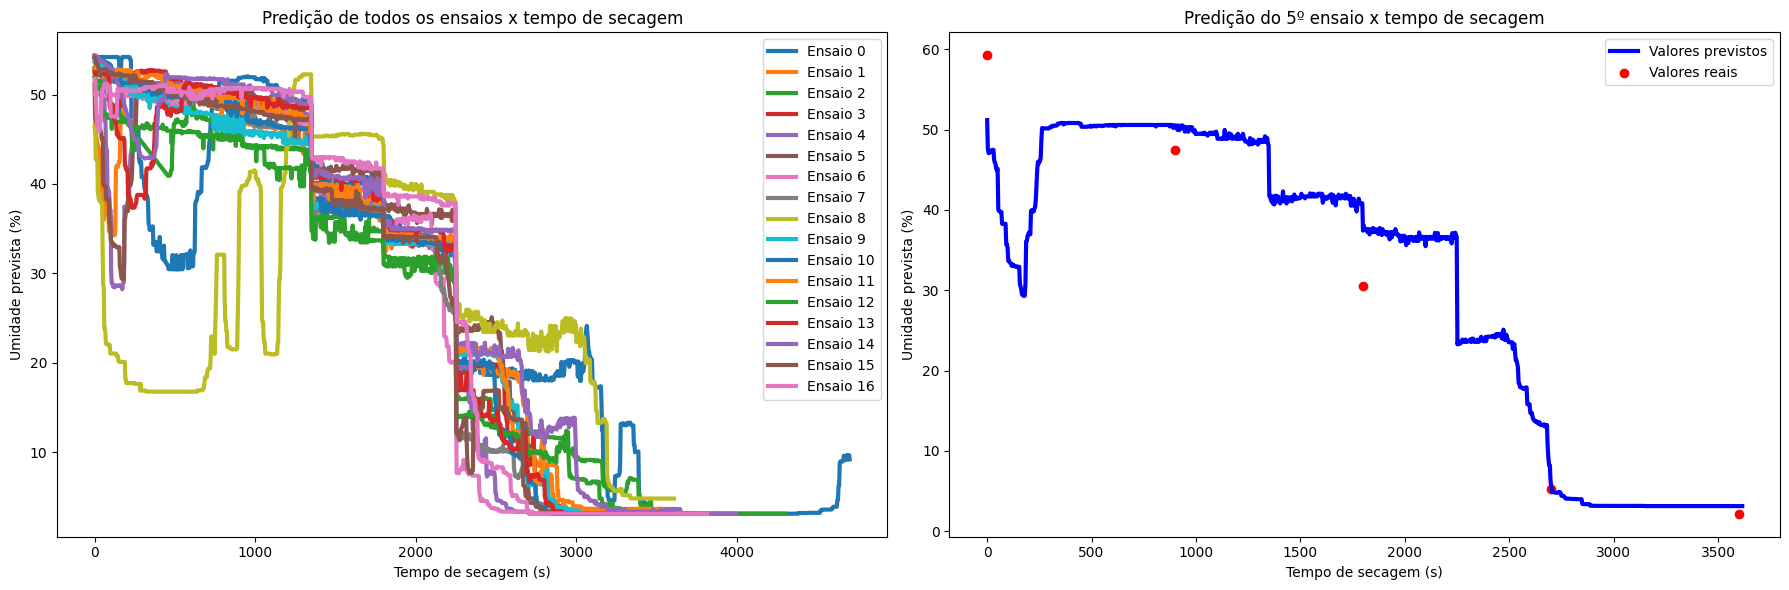

c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
102 fits failed out of a total of 170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\rapha\OneDrive\Doc

Timeless dataframe

Best model: RandomForestRegressor(ccp_alpha=0.2, max_depth=100, max_features=2,
                      min_samples_leaf=2, min_samples_split=4, n_estimators=200,
                      oob_score=True, random_state=1)
Score: 72.61%



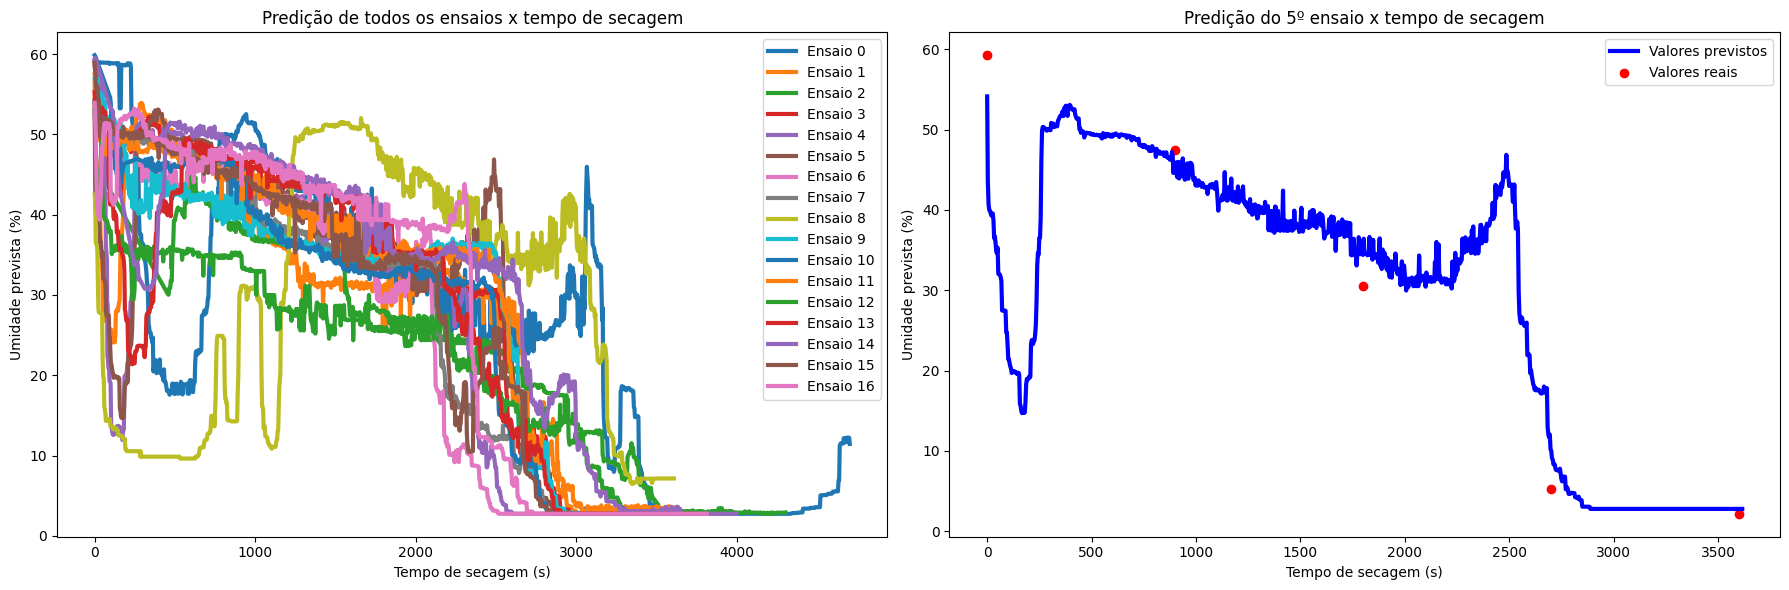

c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
102 fits failed out of a total of 170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\rapha\OneDrive\Doc

T-1 dataframe

Best model: RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features=0.5, random_state=1, warm_start=True)
Score: 92.32%



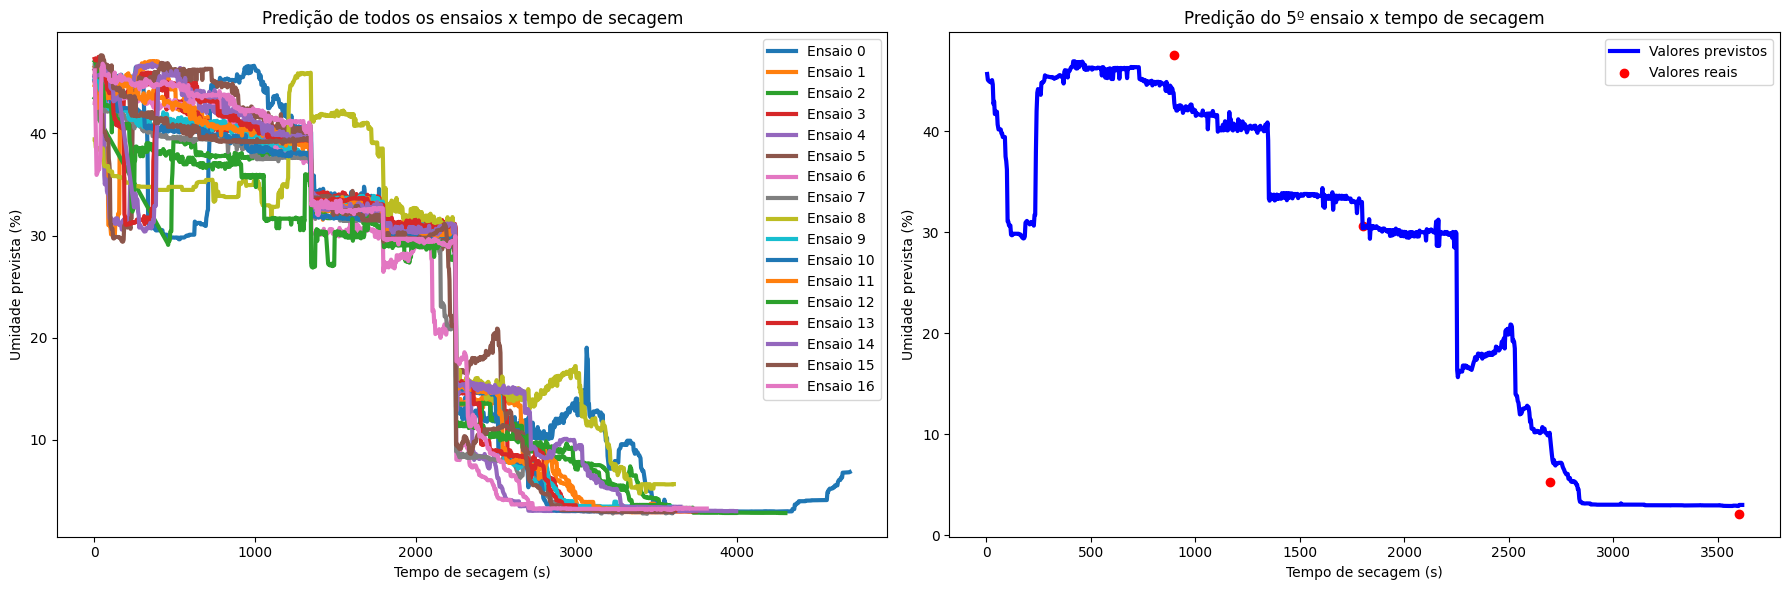

c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
85 fits failed out of a total of 170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bo

T-2 dataframe

Best model: RandomForestRegressor(bootstrap=False, ccp_alpha=0.2,
                      criterion='absolute_error', max_depth=10,
                      n_estimators=200, random_state=1)
Score: 93.99%



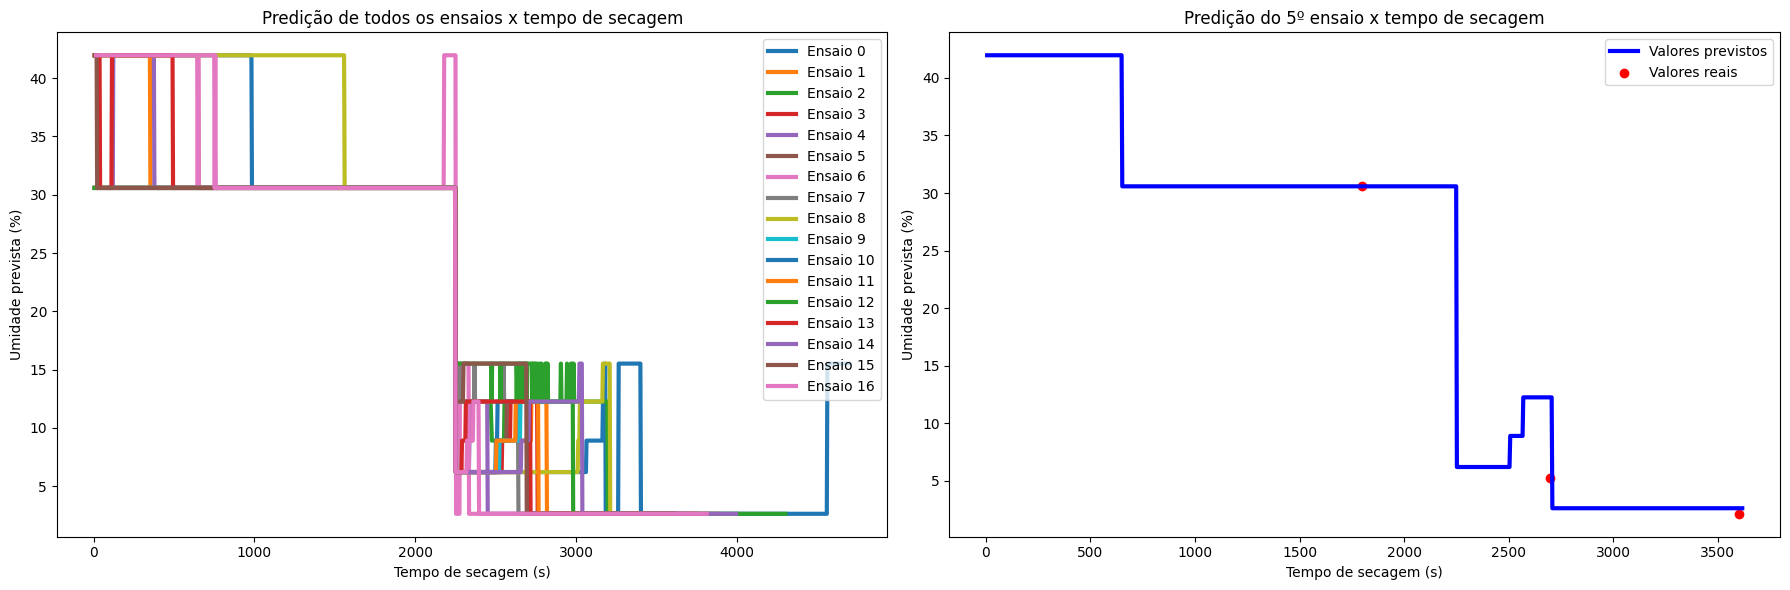

In [47]:
from sklearn.ensemble import RandomForestRegressor

base_estimator = RandomForestRegressor(random_state=1, verbose=0)
param_grid = {
    'bootstrap': [True, False],
    'ccp_alpha': [0.0, 0.1, 0.2],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 10, 20, 50, 100],
    'max_features': [0.5, 1.0, 2],
    'min_samples_leaf': [0.5, 1, 2],
    'min_samples_split': [1, 2, 4],
    'n_estimators': [50, 100, 200],
    'oob_score': [True, False],
    'warm_start': [True, False]
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### Bagging Regressor

In [48]:
from sklearn.ensemble import BaggingRegressor
BaggingRegressor().get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
85 fits failed out of a total of 170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\ensemble\_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=samp

Standard dataframe

Best model: BaggingRegressor(max_features=2, n_estimators=20, random_state=1)
Score: 87.58%



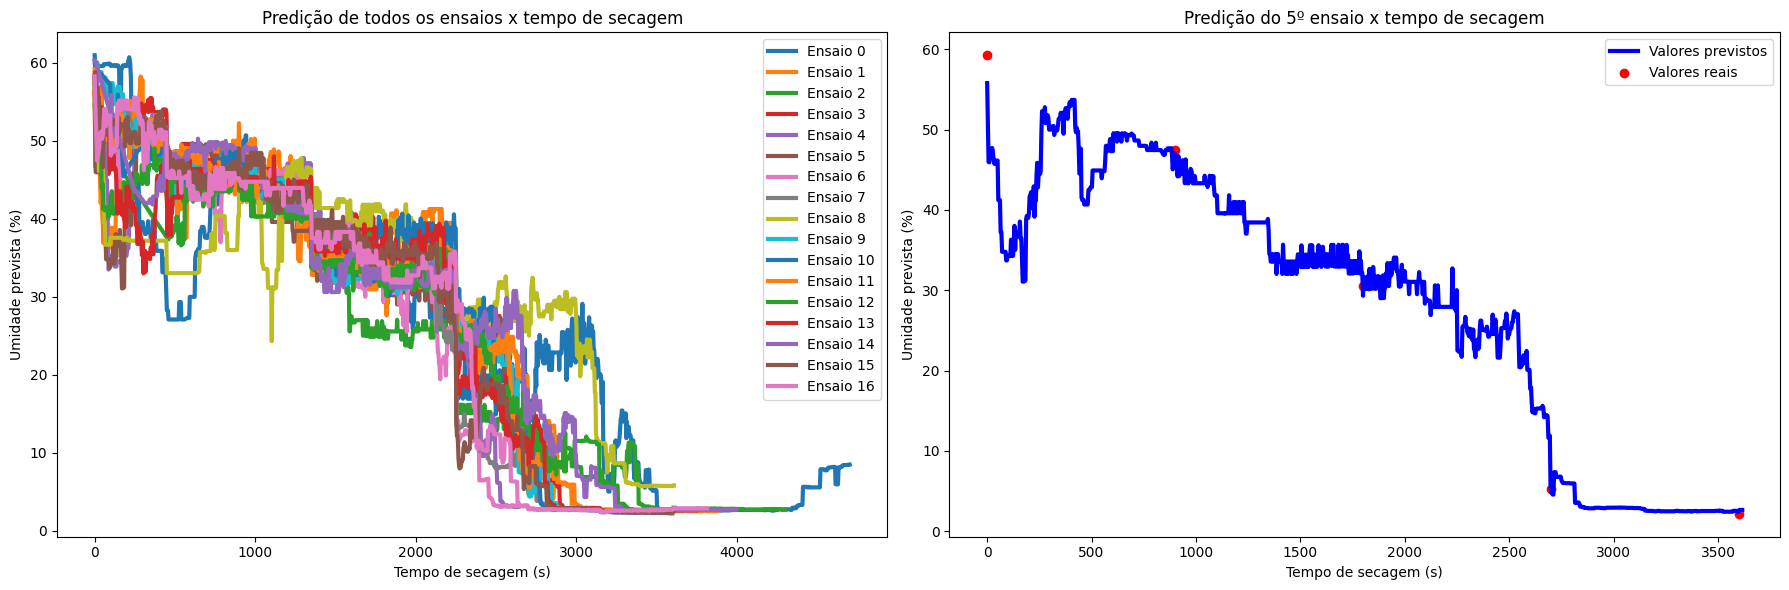

c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
34 fits failed out of a total of 170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\ensemble\_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=samp

Timeless dataframe

Best model: BaggingRegressor(max_features=0.5, max_samples=0.5, n_estimators=20,
                 random_state=1)
Score: 68.10%



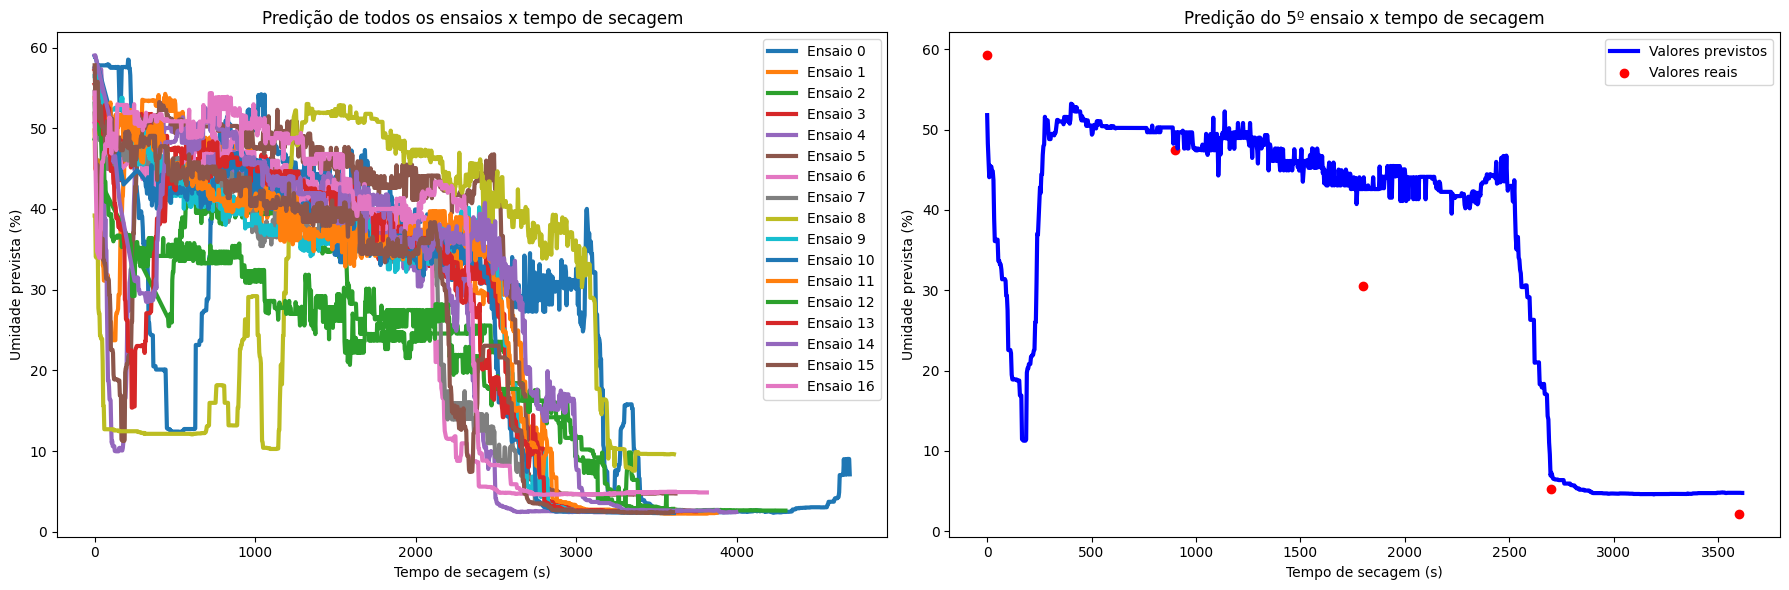

c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
68 fits failed out of a total of 170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\ensemble\_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=samp

T-1 dataframe

Best model: BaggingRegressor(n_estimators=20, random_state=1, warm_start=True)
Score: 96.81%



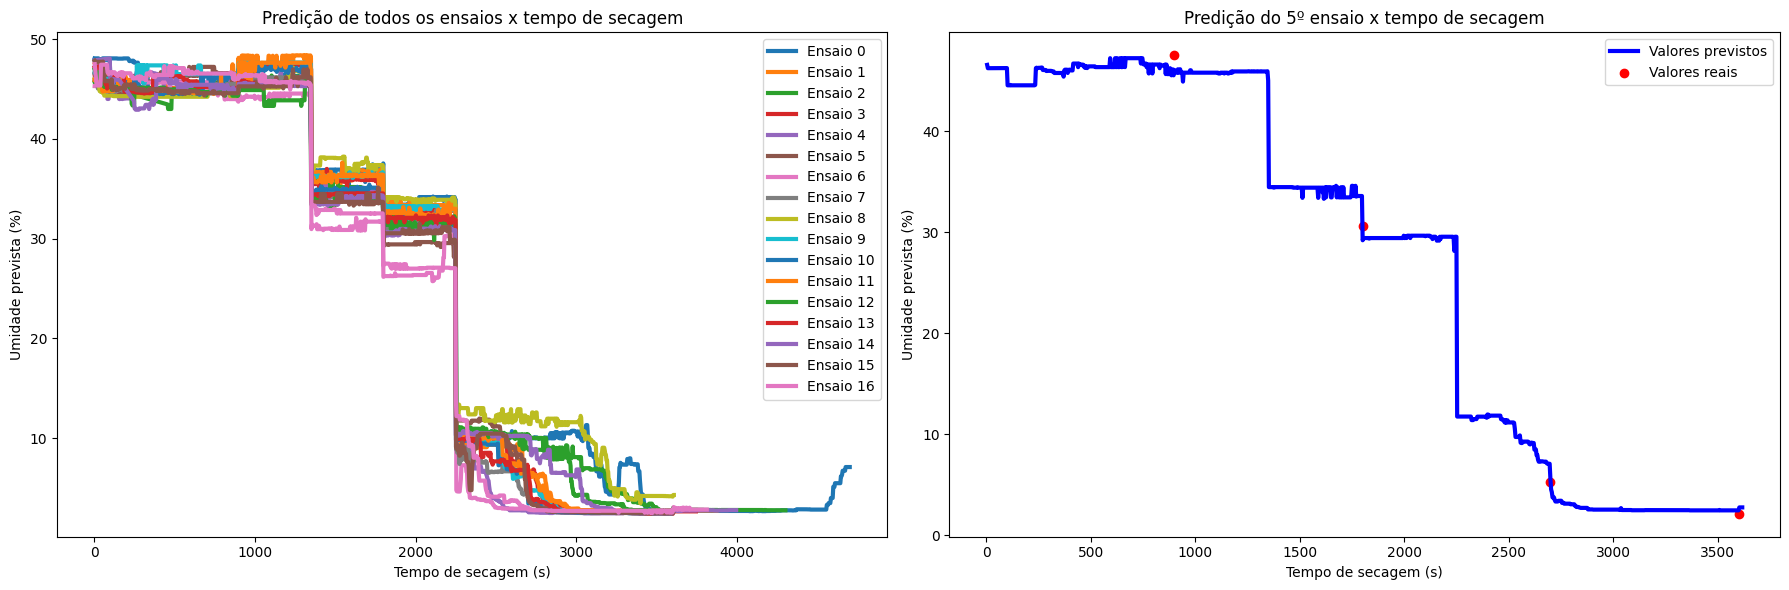

c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
102 fits failed out of a total of 170.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rapha\OneDrive\Documentos\GitHub\projects-tcc-imt-2023\.venv-tcc\lib\site-packages\sklearn\ensemble\_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sam

T-2 dataframe

Best model: BaggingRegressor(bootstrap=False, max_features=0.5, max_samples=0.5,
                 random_state=1, warm_start=True)
Score: 89.87%



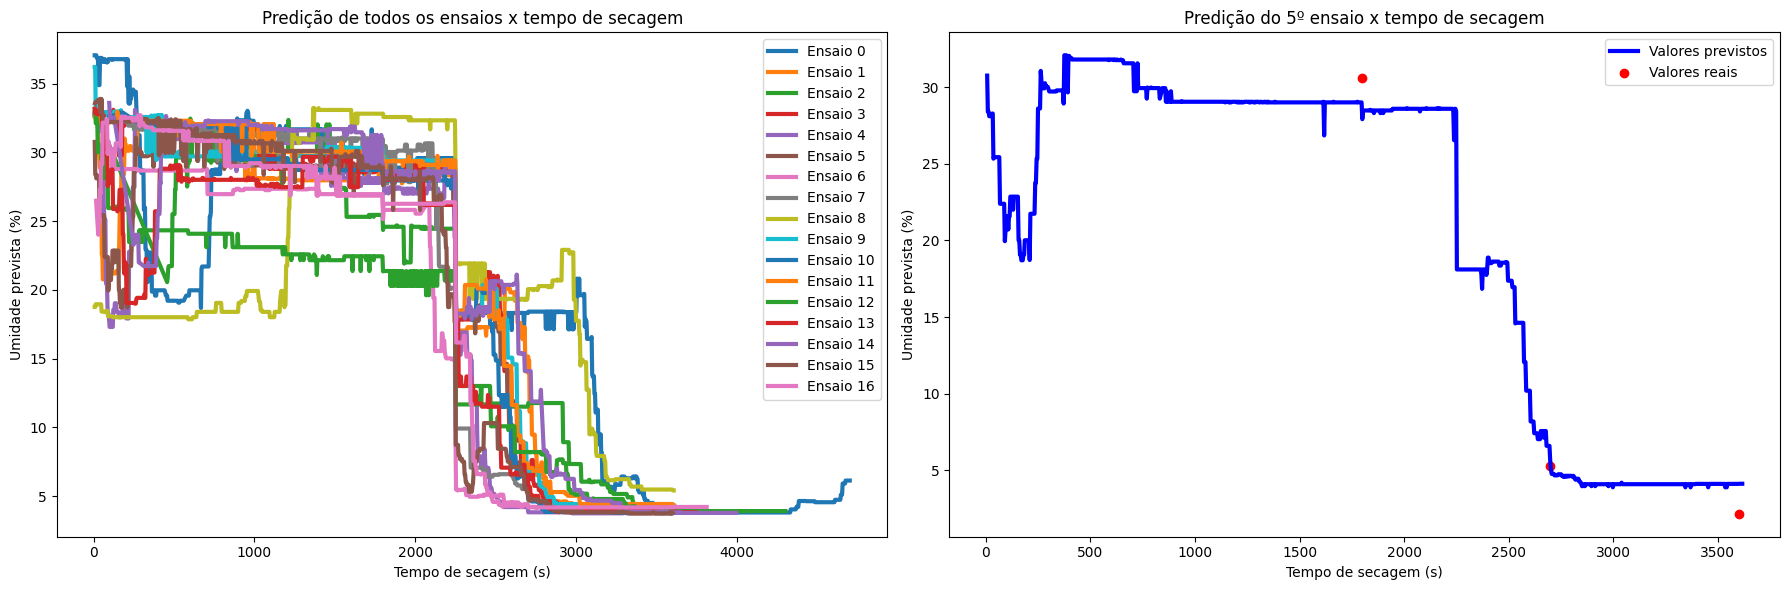

In [49]:
from sklearn.ensemble import BaggingRegressor

base_estimator = BaggingRegressor(random_state=1, verbose=0)
param_grid = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator': [None], # base estimator from which the boosted ensemble is built
    # default: None is DecisionTreeRegressor
    'max_features': [0.5, 1.0, 2],
    'max_samples': [0.5, 1.0, 2],
    'n_estimators': [5, 10, 20],
    'oob_score': [True, False],
    'warm_start': [True, False]
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### Support Vector Machine Regressor

In [50]:
from sklearn.svm import SVR

SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Standard dataframe

Best model: SVR(C=4.0, epsilon=1.0, gamma='auto', kernel='linear')
Score: 96.68%



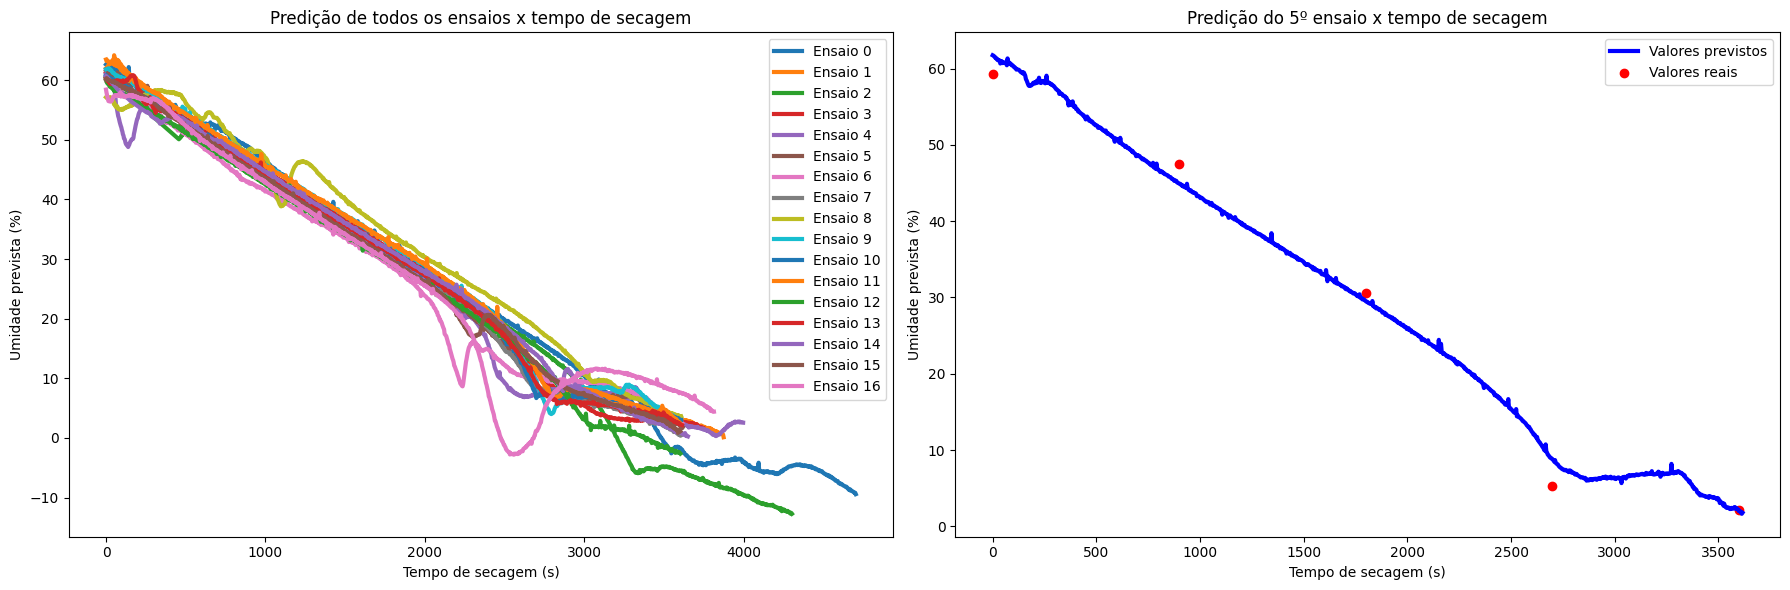

Timeless dataframe

Best model: SVR(C=4.0, epsilon=1.5, gamma='auto', kernel='linear')
Score: 62.46%



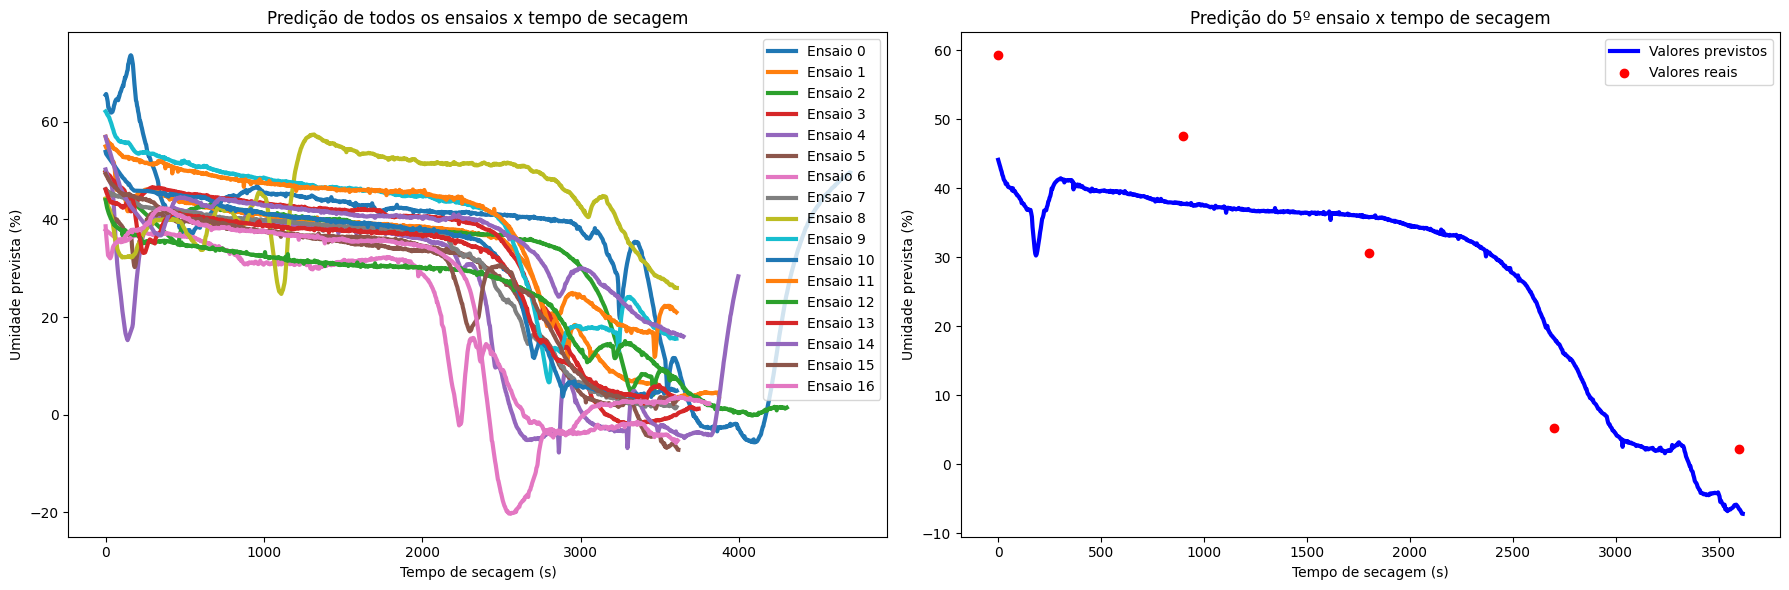

T-1 dataframe

Best model: SVR(C=1.5, epsilon=0.3, gamma='auto', kernel='linear', shrinking=False)
Score: 94.04%



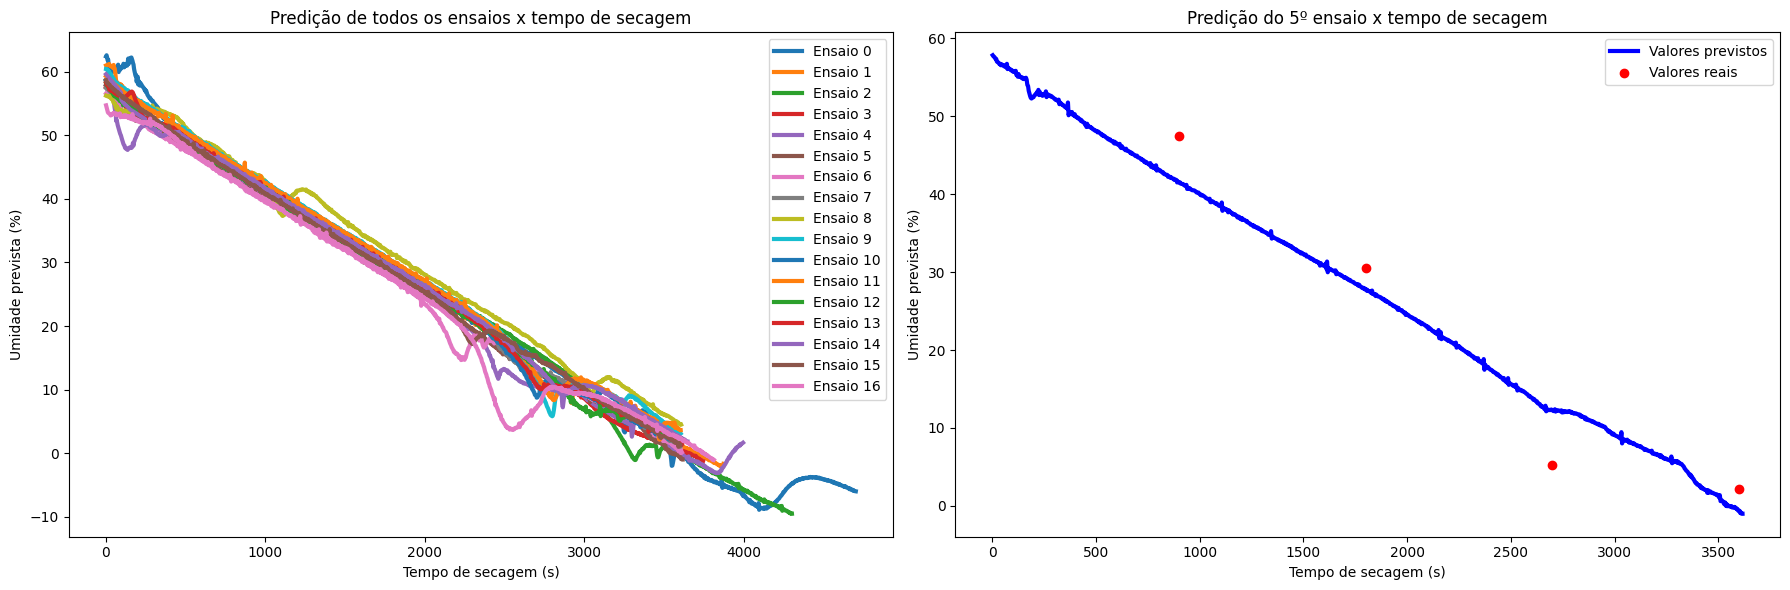

T-2 dataframe

Best model: SVR(C=2.0, epsilon=1.5, kernel='linear', shrinking=False)
Score: 87.18%



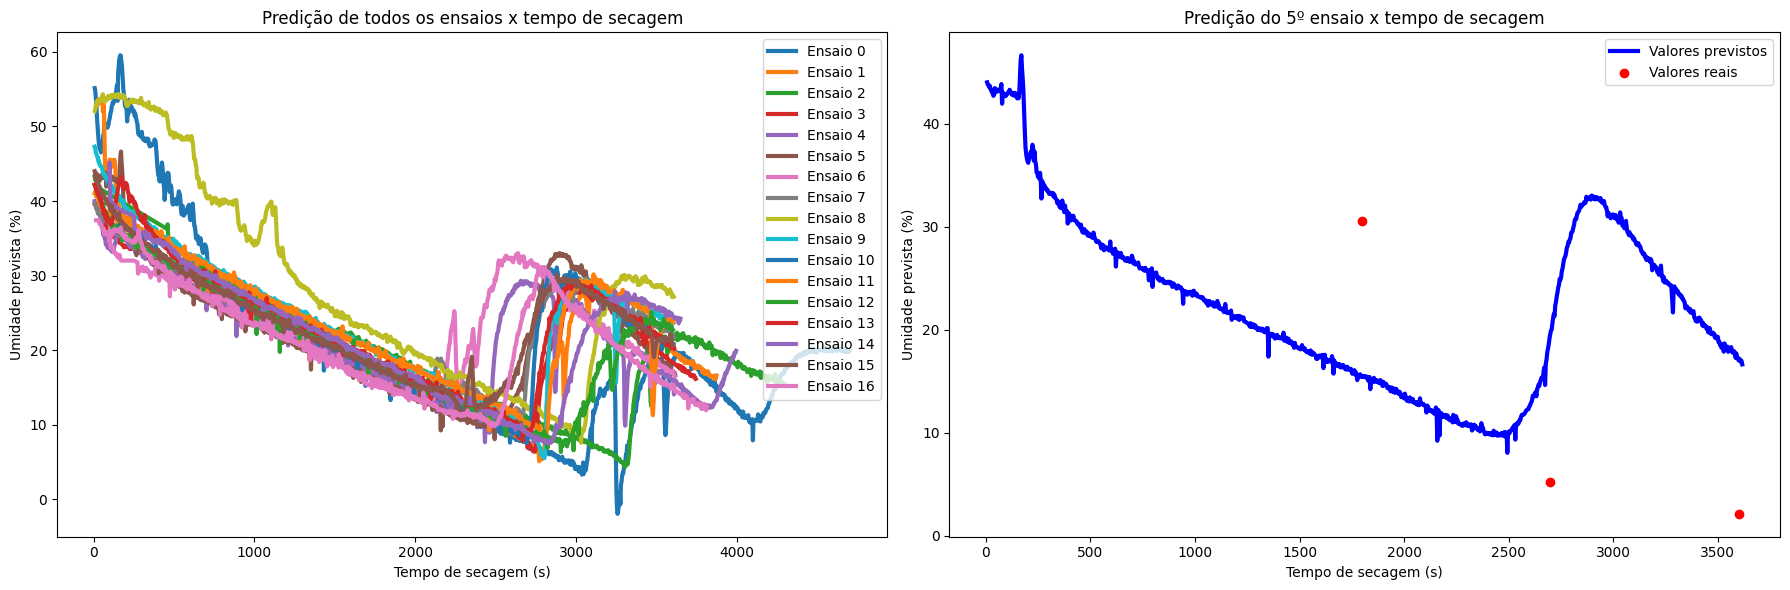

In [51]:
from sklearn.svm import SVR

base_estimator = SVR()
param_grid = {
    'C': [1.0, 1.5, 2.0, 3.0, 3.5, 4.0],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'shrinking': [True, False],
    'epsilon': [0.1, 0.2, 0.3, 1.0, 1.5]
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)

#### Multi Layer Perceptron Regresson

In [52]:
from sklearn.neural_network import MLPRegressor

MLPRegressor().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Standard dataframe

Best model: MLPRegressor(alpha=0.0004, early_stopping=True, hidden_layer_sizes=100,
             learning_rate='adaptive', shuffle=False, solver='lbfgs',
             validation_fraction=0.2)
Score: 96.87%



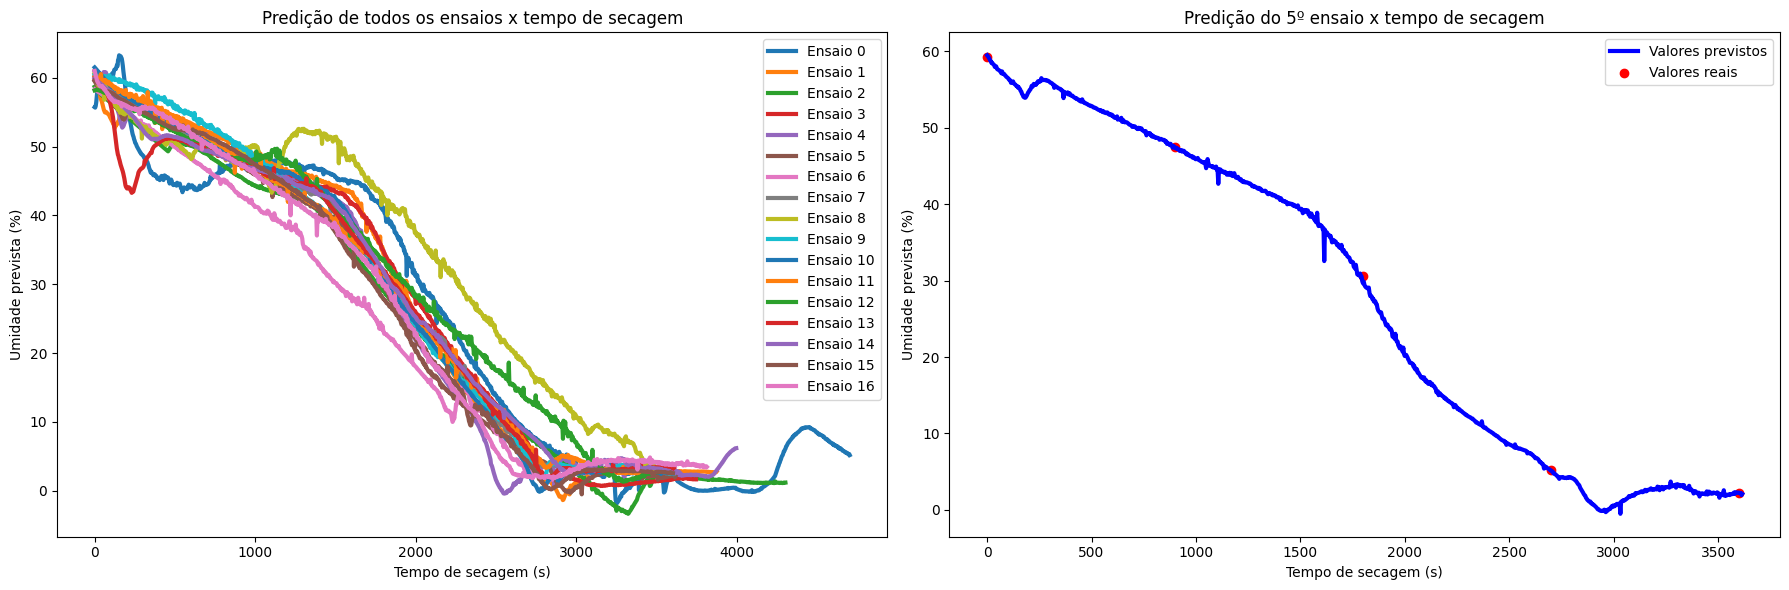

c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Timeless dataframe

Best model: MLPRegressor(hidden_layer_sizes=100, learning_rate='adaptive', shuffle=False,
             solver='sgd', validation_fraction=0.2)
Score: 73.79%



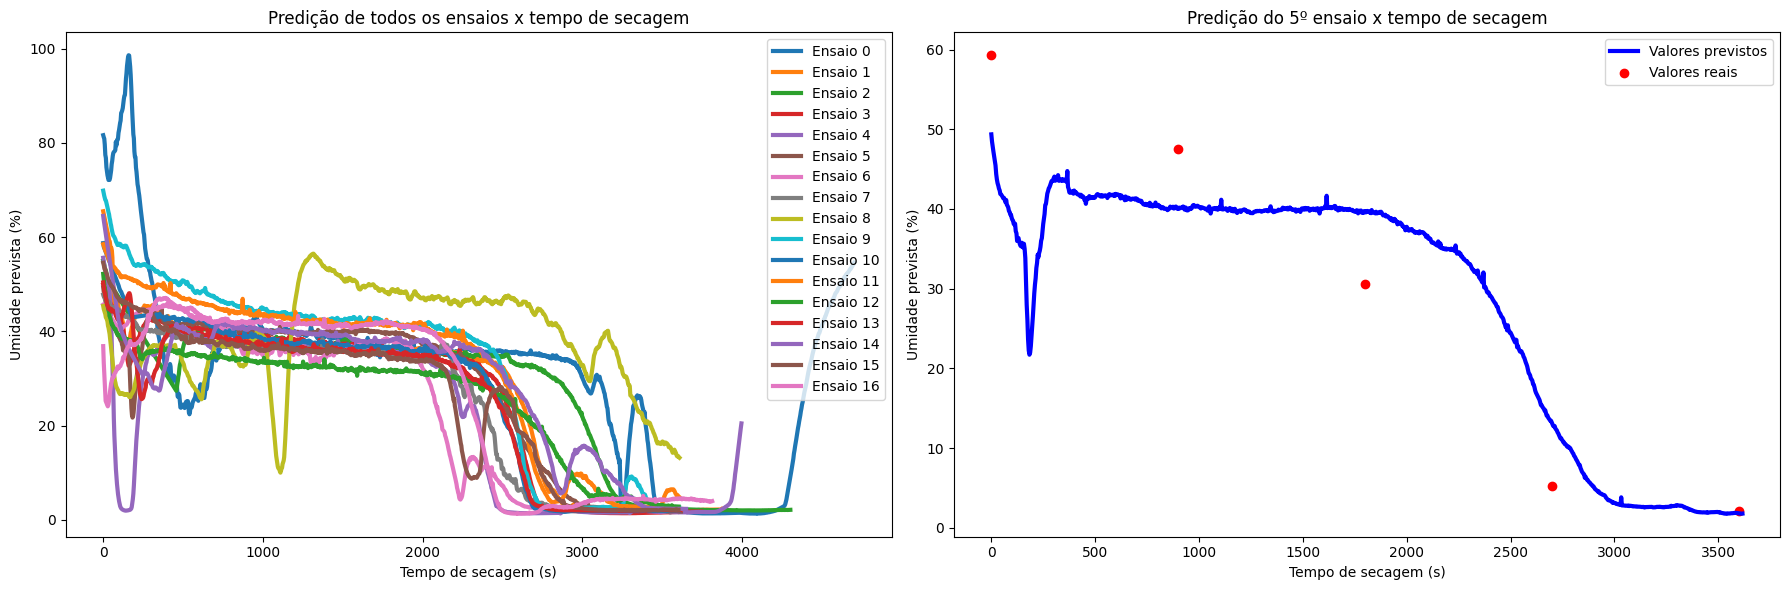

c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lb

T-1 dataframe

Best model: MLPRegressor(activation='logistic', alpha=0.0002, hidden_layer_sizes=100,
             shuffle=False, solver='sgd')
Score: 95.43%



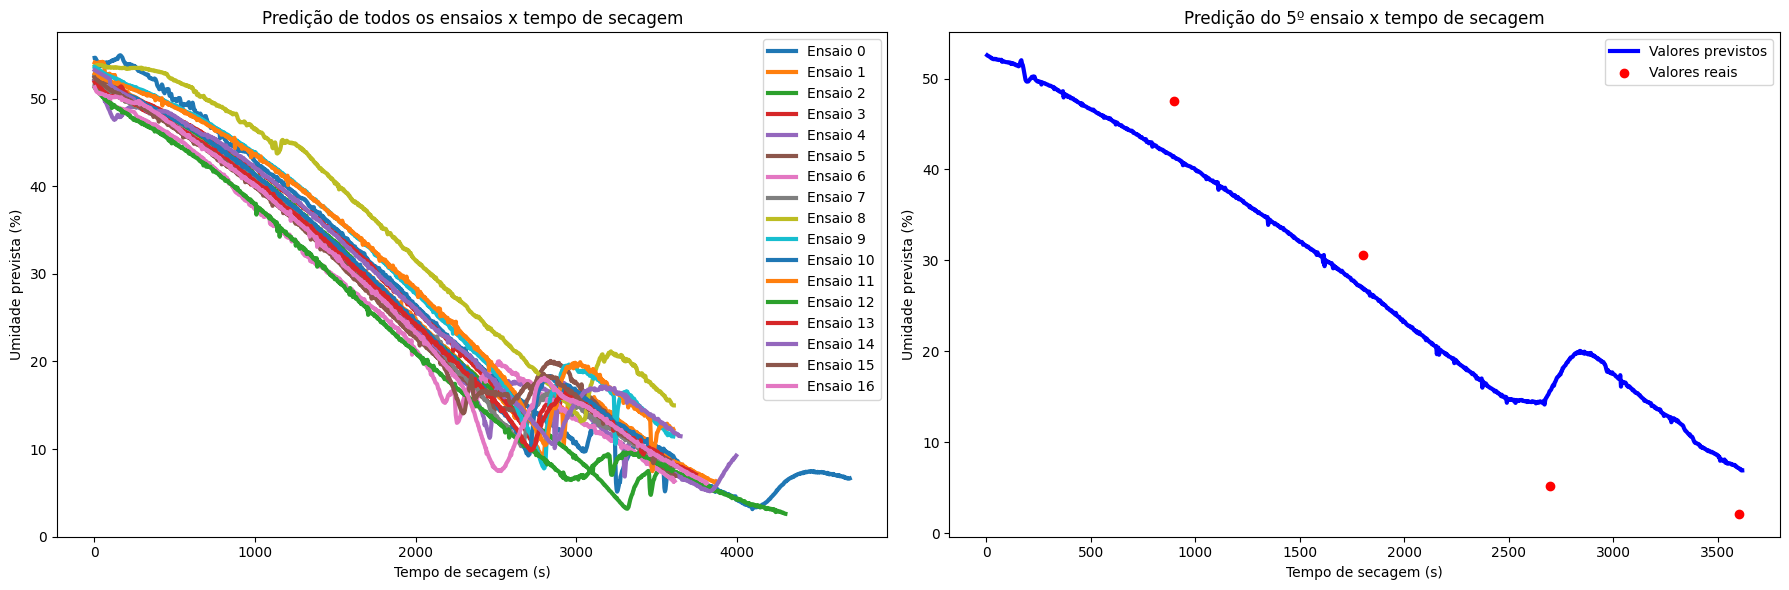

c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Martin\Documents\PythonEnvs\TCCEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

T-2 dataframe

Best model: MLPRegressor(hidden_layer_sizes=100, learning_rate='adaptive', shuffle=False,
             solver='sgd')
Score: 93.26%



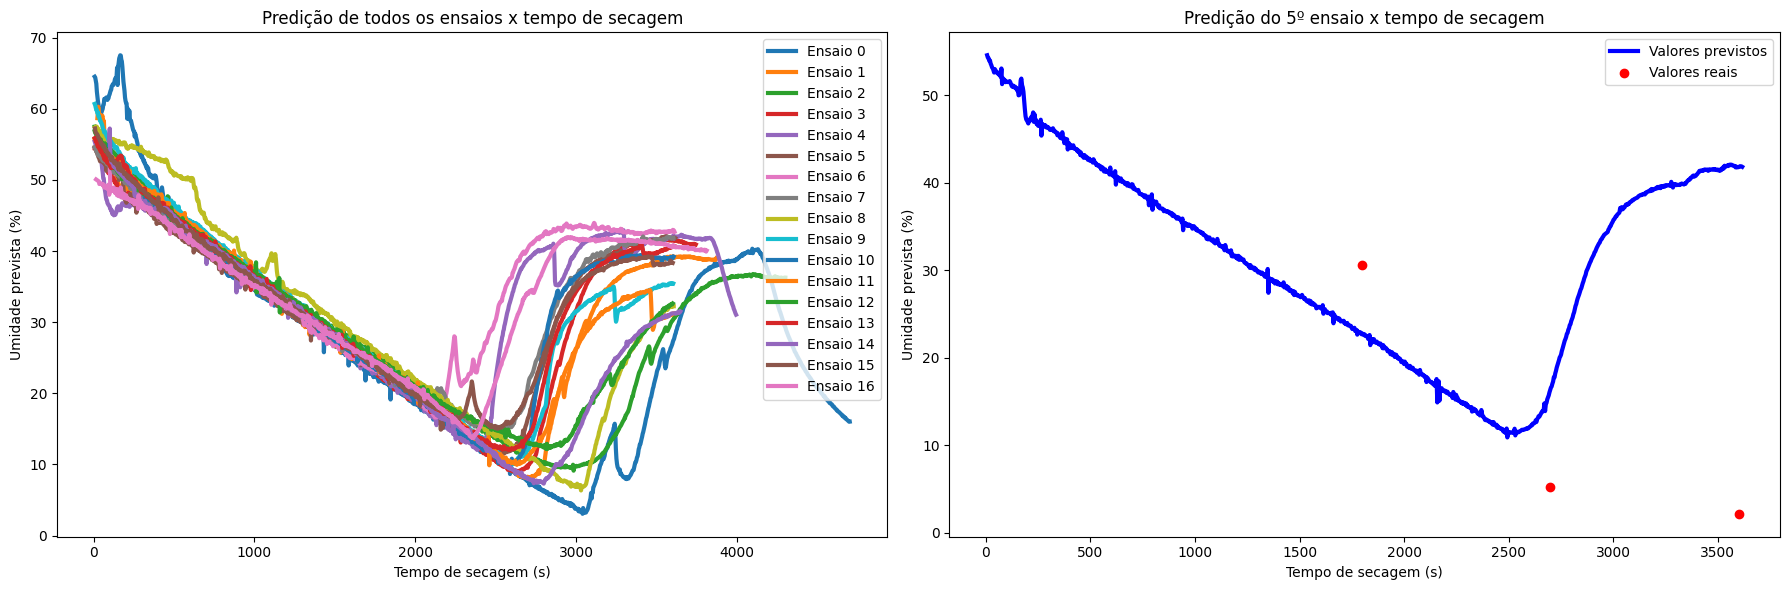

In [ ]:
from sklearn.neural_network import MLPRegressor

base_estimator = MLPRegressor(max_iter=1000)
param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.0002, 0.0003, 0.0004],
    'early_stopping': [False, True],
    'hidden_layer_sizes': [[100], [30, 30, 30], [25, 25, 25, 25], [10, 20, 10], [50, 25, 10]],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'shuffle': [True, False],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'validation_fraction': [0.1, 0.2, 0.3],
}

for key in dfs.keys():
    types_dfs = dfs[key].keys()
    trained_model = train(base_estimator, dfs[key]['train_norm'], param_grid, verbose=False)
    plot_essay_predictions(key, trained_model)